# Machine Learning: AllLife Bank Personal Loan Campaign

## Problem Statement

### Context

AllLife Bank is a US bank that has a growing customer base. The majority of these customers are liability customers (depositors) with varying sizes of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors).

A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio.

You as a Data scientist at AllLife bank have to build a model that will help the marketing department to identify the potential customers who have a higher probability of purchasing the loan.

### Objective

To predict whether a liability customer will buy personal loans, to understand which customer attributes are most significant in driving purchases, and identify which segment of customers to target more.

### Data Dictionary
* `ID`: Customer ID
* `Age`: Customer’s age in completed years
* `Experience`: #years of professional experience
* `Income`: Annual income of the customer (in thousand dollars)
* `ZIP Code`: Home Address ZIP code.
* `Family`: the Family size of the customer
* `CCAvg`: Average spending on credit cards per month (in thousand dollars)
* `Education`: Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional
* `Mortgage`: Value of house mortgage if any. (in thousand dollars)
* `Personal_Loan`: Did this customer accept the personal loan offered in the last campaign? (0: No, 1: Yes)
* `Securities_Account`: Does the customer have securities account with the bank? (0: No, 1: Yes)
* `CD_Account`: Does the customer have a certificate of deposit (CD) account with the bank? (0: No, 1: Yes)
* `Online`: Do customers use internet banking facilities? (0: No, 1: Yes)
* `CreditCard`: Does the customer use a credit card issued by any other Bank (excluding All life Bank)? (0: No, 1: Yes)

### Importing necessary libraries

### Not needed for Google Colab

In [ ]:
# Installing the libraries with the specified version.
#!pip install numpy==1.25.2 pandas==1.5.3 matplotlib==3.7.1 seaborn==0.13.1 scikit-learn==1.2.2 sklearn-pandas==2.2.0 -q --user

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

### Mount google drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
os.chdir('/content/drive/MyDrive/GL-Projects/DecisionTree/')
os.listdir()

['SM-AIML_ML_Project_full_code_notebook.ipynb',
 'Loan_Modelling.csv',
 'AIML_ML_Project_full_code_notebook.ipynb',
 'Backup_SM-AIML_ML_Project_full_code_notebook.ipynb',
 'Loan_Modelling_with_city_state_encoded.csv',
 'Loan_Modelling_with_city_state.csv',
 'Loan_Modelling_with_city_encoded.csv',
 'Loan_Modelling_with_city_encoded_capped-outliers.csv',
 'metrics_comp.csv']

### Necessary Imports

In [ ]:
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

###Loading the dataset

In [ ]:
ldata = pd.read_csv('Loan_Modelling.csv')

## Data Overview

* Observations
* Sanity checks

#### Observing what the data looks like

In [ ]:
ldata.head()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


### Checking number of rows and columns

In [ ]:
print('Number of rows: ', ldata.shape[0])
print('Number of columns: ', ldata.shape[1])

Number of rows:  5000
Number of columns:  14


### Checking info on data and null values

In [ ]:
ldata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


**Observations:**
- no null columns are present in data set
- all columns are numeric

## Exploratory Data Analysis.

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. What is the distribution of mortgage attribute? Are there any noticeable patterns or outliers in the distribution?
2. How many customers have credit cards?
3. What are the attributes that have a strong correlation with the target attribute (personal loan)?
4. How does a customer's interest in purchasing a loan vary with their age?
5. How does a customer's interest in purchasing a loan vary with their education?

### What is the distribution of mortgage attribute? Are there any noticeable patterns or outliers in the distribution?

- creating a function to plot this

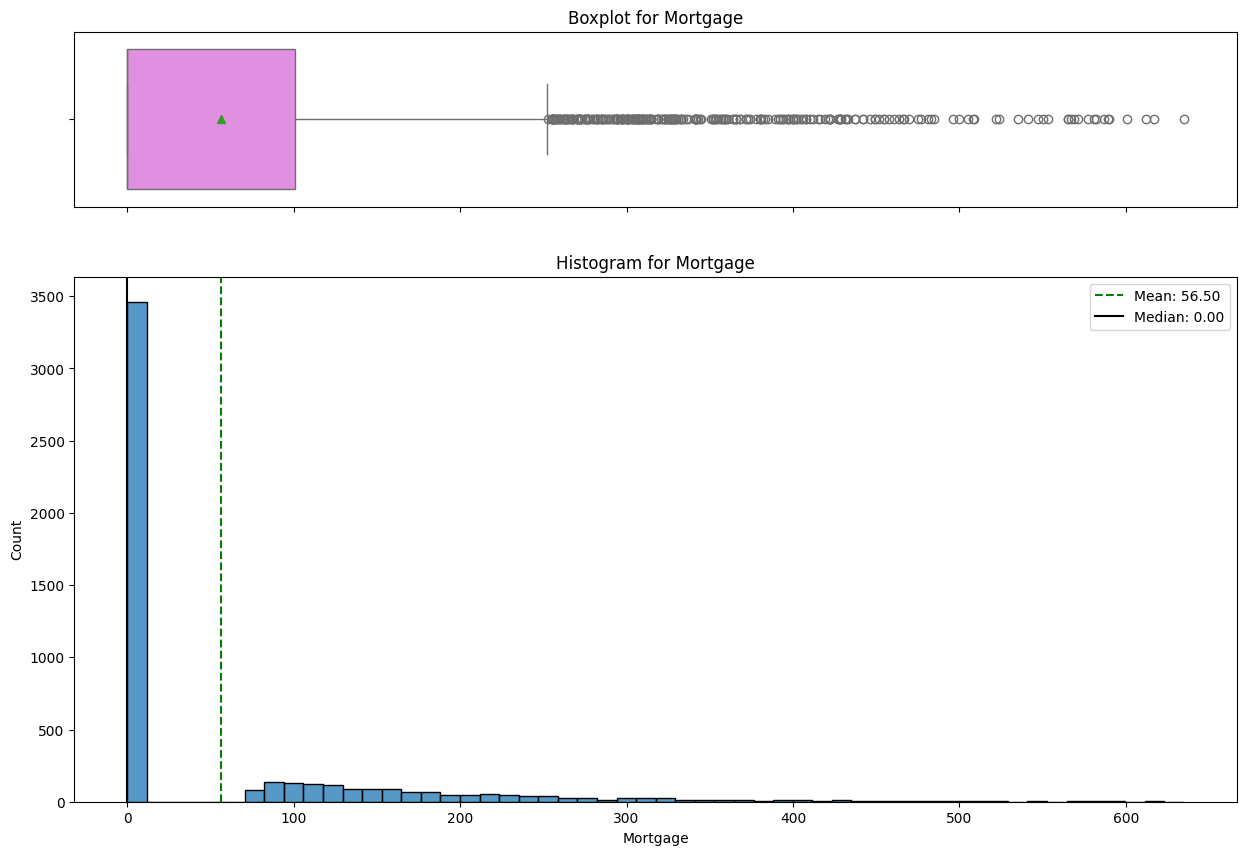

Skewness for Mortgage: 2.10
=_==_==_==_==_==_==_==_==_==_==_==_==_==_==_==_==_==_==_==_==_==_==_==_==_==_==_==_==_==_==_==_==_==_==_==_==_==_==_==_==_==_==_==_==_==_==_==_==_==_= 



In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None, title=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    title: title for the plots (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots

    # Add title to the entire figure
    if title:
        plt.suptitle(title, fontsize=16)

    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column

    if bins:
        sns.histplot(data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins)  # For histogram with bins
    else:
        sns.histplot(data=data, x=feature, kde=kde, ax=ax_hist2)  # For histogram without bins

    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--", label=f'Mean: {data[feature].mean():.2f}'
    )  # Add mean to the histogram

    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-", label=f'Median: {data[feature].median():.2f}'
    )  # Add median to the histogram

    ax_hist2.legend()

    # Add titles to the subplots
    ax_box2.set_title(f'Boxplot for {feature}')
    ax_hist2.set_title(f'Histogram for {feature}')

    plt.show()
    # Calculate Skewness
    print(f'Skewness for {feature}: {data[feature].skew():.2f}')
    #
    print(f"{'=_=' * 50} \n")



histogram_boxplot(data=ldata, feature='Mortgage')

#### **Observation for Mortgage:**

- Mortgate is right Skewed by 2.10
- Many Outliers on the high end

### What percentage of customers took out Personal Loans

In [ ]:
ldata['Personal_Loan'].value_counts()

Personal_Loan
0    4520
1     480
Name: count, dtype: int64

In [ ]:
ldata['Personal_Loan'].value_counts(1) # same as normalize=True

Personal_Loan
0    0.904
1    0.096
Name: proportion, dtype: float64

#### **Observation:** 9.6 % of customers took out personal loans

### What are the attributes that have a strong correlation with the target attribute (personal loan)?

In [ ]:
ldata.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIPCode', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal_Loan', 'Securities_Account',
       'CD_Account', 'Online', 'CreditCard'],
      dtype='object')

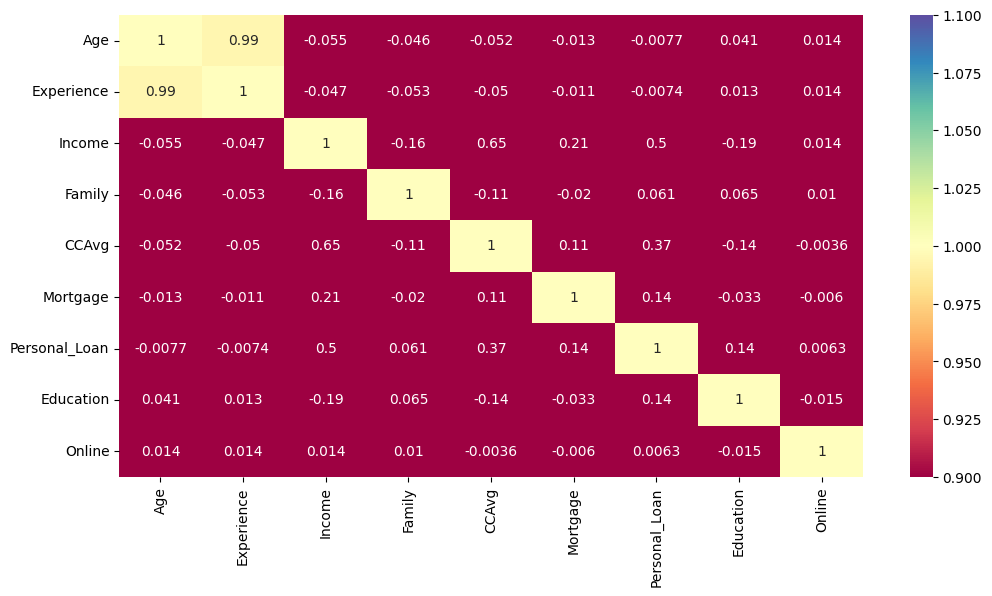

In [ ]:
# create a temporary DF, because we don't want to see items like customerID, etc
tempdf = ldata[['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Mortgage', 'Personal_Loan', 'Education', 'Online']]
# create a heatmap
plt.figure(figsize=(12,6))
sns.heatmap(tempdf.corr(), annot=True, cmap='Spectral', vmin=1, vmax=1);



#### **Observation:**
-  Personal_Loan has a weak positive co-relationship with CCAvg
- Income has a weak positive co-relationship with CCAvg
- Personal_Loan does not seem to have much of a co-relationship with Age
- Personal_Loan does not seem to have much of a co-relationship with Education

<br><br>

**Does this make sense**
- This makes sense, because higher earners spend more money on Credit Cards.
- Those who spend lots of money on Credit Cards also tend to take out more Personal Loans
- It is an interesting observation that Age and Education does not seem to effect Personal Loan decision

### Bivariate Analysis: Let's also do a pairplot to find out if there is any obvious co-relations

- looking at tempdf to refresh what the data looks like for the coluns chosen

In [ ]:
tempdf.head()

,Age,Experience,Income,Family,CCAvg,Mortgage,Personal_Loan,Education,Online
0,25,1,49,4,1.6,0,0,1,0
1,45,19,34,3,1.5,0,0,1,0
2,39,15,11,1,1.0,0,0,1,0
3,35,9,100,1,2.7,0,0,2,0
4,35,8,45,4,1.0,0,0,2,0


### Let's scale the data first (standardization)

**Reasons for Scaling:**
- Consistency in Scale: Scaling ensures that all variables contribute equally to the analysis. Variables like "Income" and "Mortgage" can have large numerical ranges compared to variables like "Age" or "Family," potentially skewing the analysis if not scaled.

- Enhanced Visualization: When variables are on a similar scale, it is easier to visually interpret relationships between them in a pair plot. Differences in scale can lead to misleading visualizations where some variables appear to have stronger or weaker relationships than they actually do.

- Improved Analysis: Standardization helps in identifying true patterns and correlations. It makes it easier to compare coefficients, distances, and results across different variables.

In [ ]:
from scipy.stats import zscore
# now apply z score to normalize the data
tempdf_z_scaled = tempdf.apply(zscore)
tempdf_z_scaled.head()

,Age,Experience,Income,Family,CCAvg,Mortgage,Personal_Loan,Education,Online
0,-1.774417,-1.666078,-0.538229,1.397414,-0.193385,-0.555524,-0.325875,-1.049078,-1.216618
1,-0.029524,-0.096330,-0.864109,0.525991,-0.250611,-0.555524,-0.325875,-1.049078,-1.216618
2,-0.552992,-0.445163,-1.363793,-1.216855,-0.536736,-0.555524,-0.325875,-1.049078,-1.216618
3,-0.901970,-0.968413,0.569765,-1.216855,0.436091,-0.555524,-0.325875,0.141703,-1.216618
4,-0.901970,-1.055621,-0.625130,1.397414,-0.536736,-0.555524,-0.325875,0.141703,-1.216618


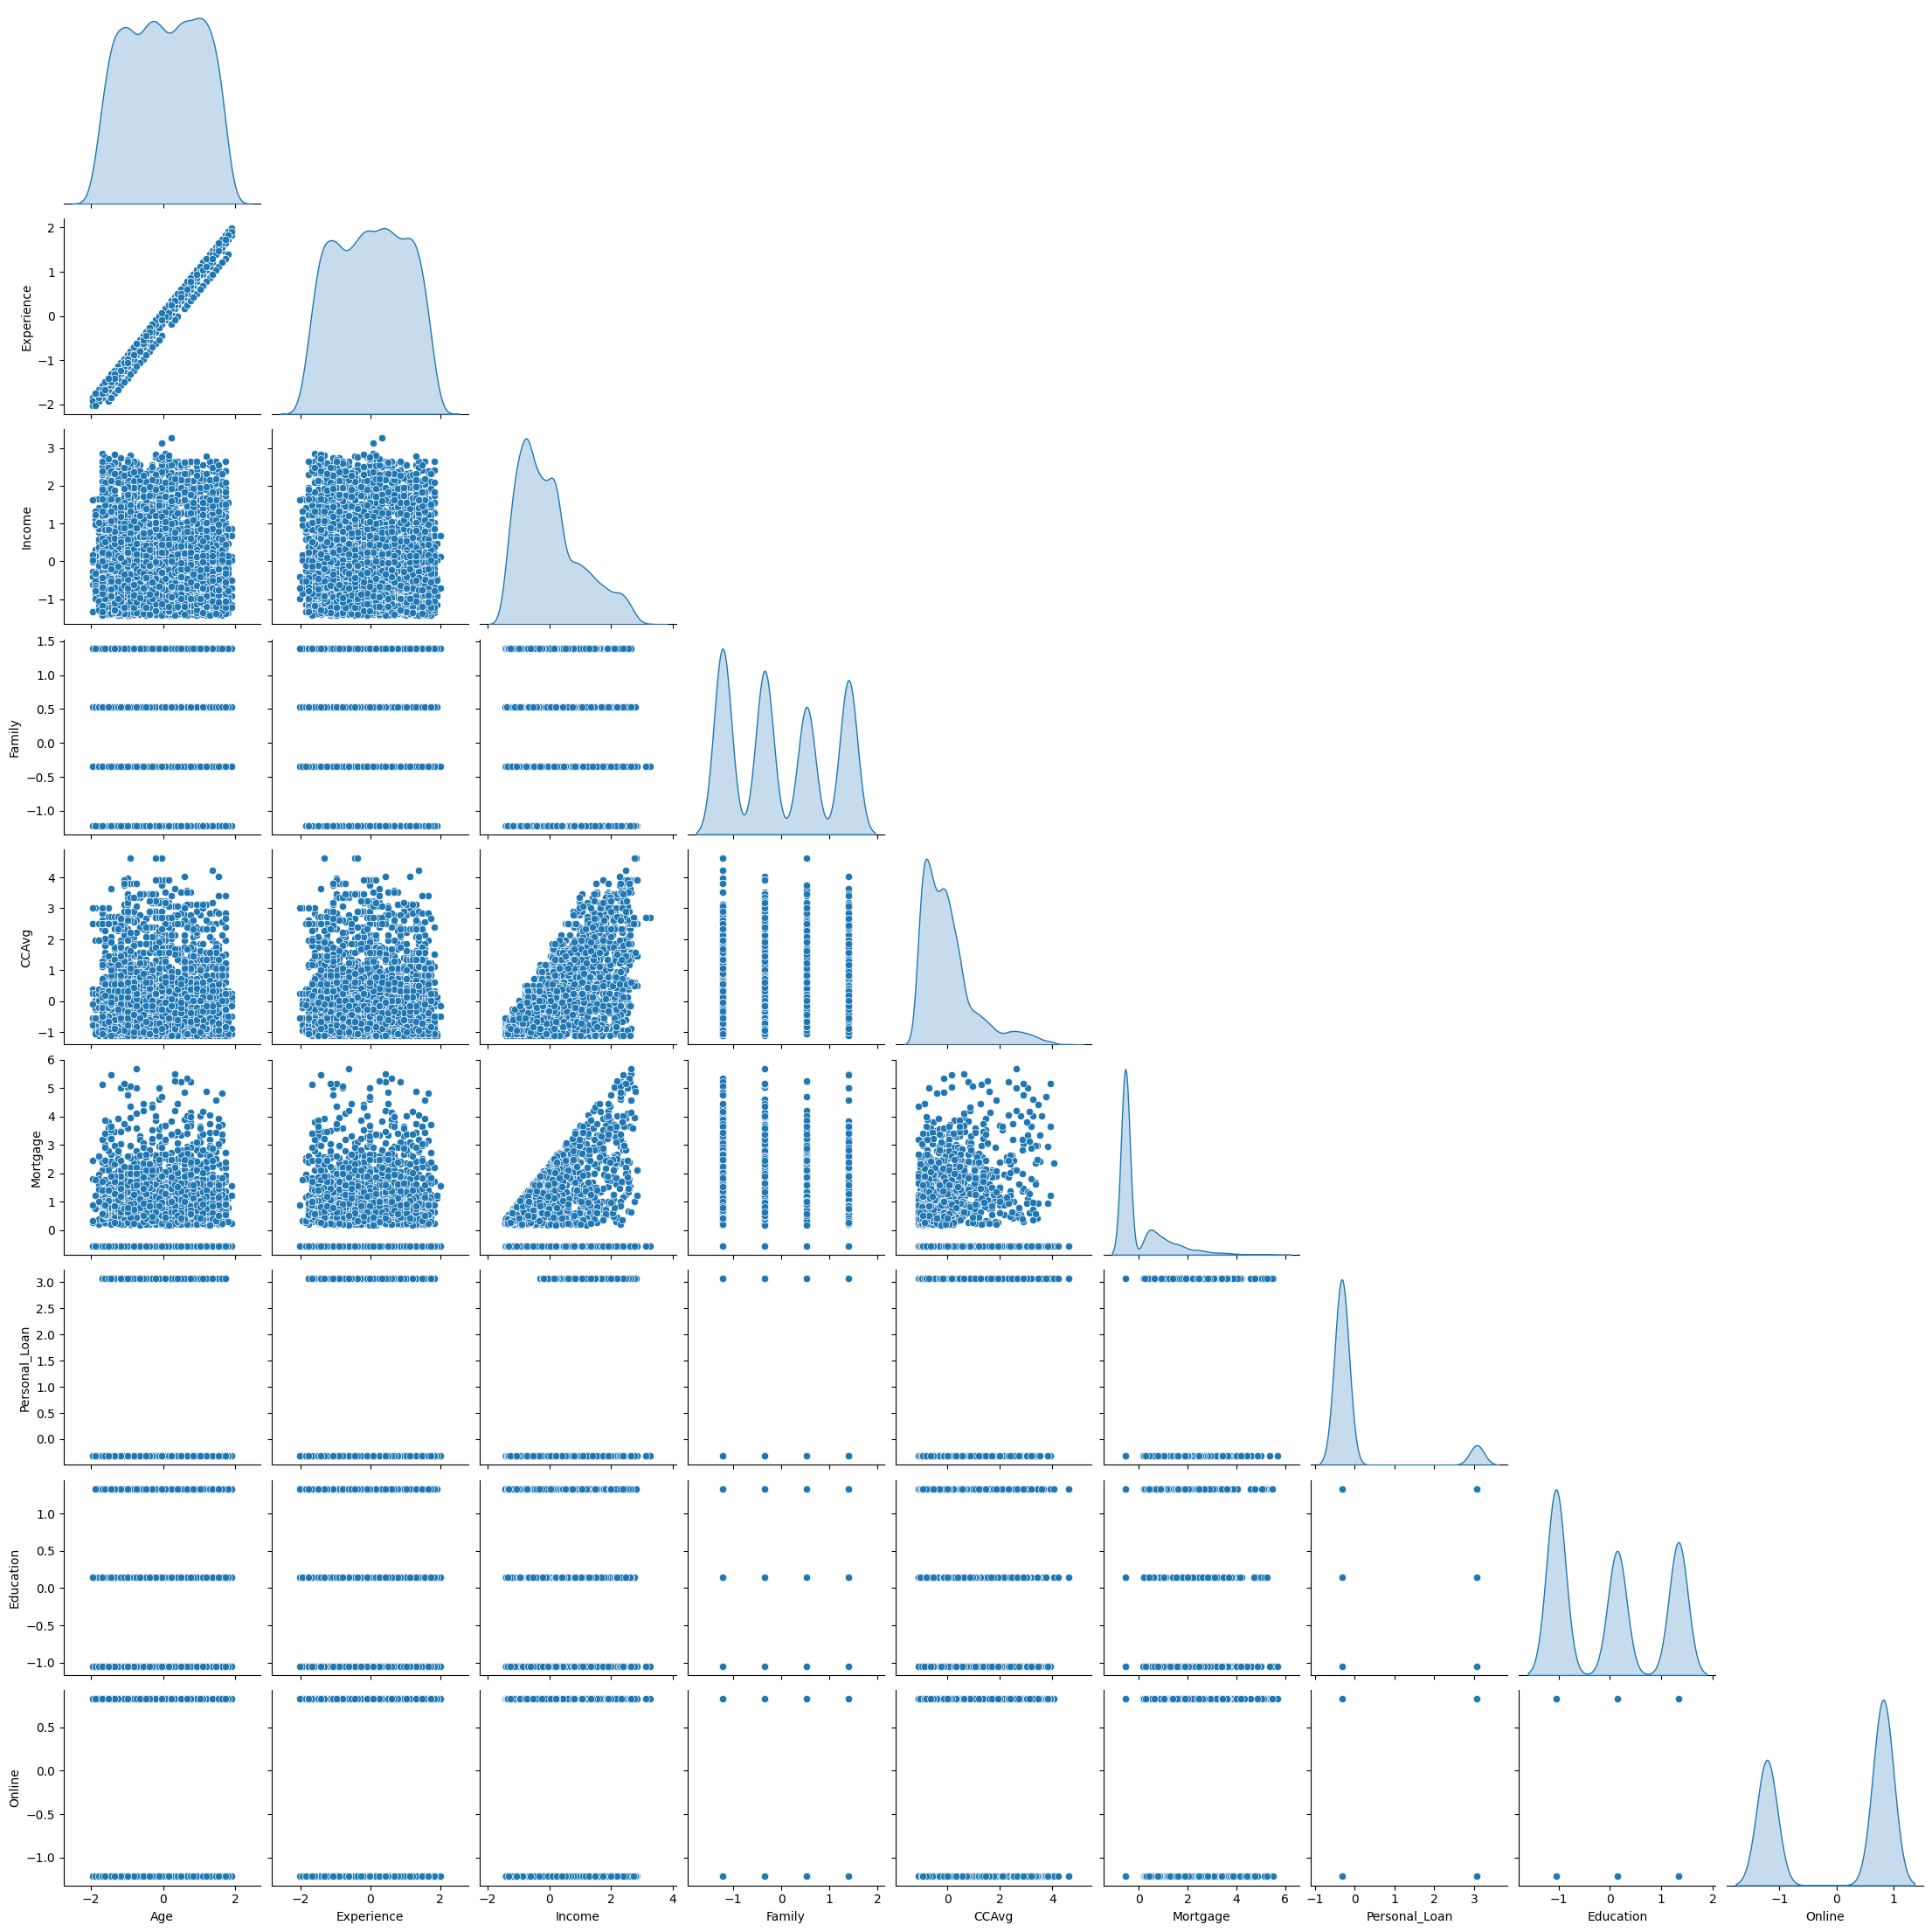

In [ ]:
# Now let's draw a pair plot
sns.pairplot(tempdf_z_scaled, diag_kind='kde', corner=True)

**Interpretation of pair plot**

**income v. mortgate**

- Positive Correlation: There appears to be a positive correlation between income and mortgage amounts. As income increases, the mortgage amount tends to increase as well.

- Density at Lower Incomes: The plot shows a high density of data points at lower income levels with a relatively lower mortgage amount. This suggests that a larger number of individuals or households with lower incomes have smaller mortgages.

- Spread at Higher Incomes: At higher income levels, the spread of mortgage amounts becomes more significant. This indicates that individuals or households with higher incomes have a wider range of mortgage amounts.

- Potential Outliers: There are some data points at the higher end of the mortgage scale, which could indicate outliers or individuals with particularly high mortgage amounts relative to their income.

**Income v. Credit Card Average**

- Positive Correlation: The plot shows a positive correlation between income and credit card balance. As income increases, the average credit card balance tends to increase as well.

- Density at Lower Incomes: There is a high density of data points at the lower income levels with a lower credit card balance. This suggests that a significant number of individuals with lower incomes maintain lower average credit card balances.

- Spread at Higher Incomes: At higher income levels, the spread of credit card balances becomes more significant, indicating that individuals with higher incomes have a wider range of credit card balances.

- Outliers: A few data points at higher income levels show unusually high credit card balances, which might indicate outliers or individuals with significantly higher spending habits or credit limits.

**Experience v.s income**

- Lack of Clear Correlation: The scatter plot shows a relatively even distribution of points, indicating no clear or strong correlation between experience and income.

- Density: The points are densely packed throughout the plot, suggesting that individuals with various levels of experience can have a wide range of incomes.

- Outliers: There are a few data points where individuals with a certain level of experience have significantly higher incomes, which might indicate outliers or exceptional cases.

**Age v. experience**
- Strong Positive Correlation: The plot shows a clear and strong positive linear correlation between age and experience. As age increases, experience also increases proportionally.

- Linear Relationship: The data points form a narrow band, suggesting a consistent and direct linear relationship between age and experience.

**Family v. mortgage**
- Distinct Columns of Points: The scatter plot shows distinct vertical columns of points. Each column represents a specific family size, with mortgage values distributed along the y-axis.

- Range of Mortgage Values: Within each family size category, there is a range of mortgage values, indicating variability in mortgage amounts irrespective of family size.

- Small Families: For smaller family sizes, there is a wide range of mortgage values, suggesting that mortgage amounts are not solely dependent on the size of the family.

- Larger Families: Similarly, larger family sizes also show a range of mortgage values, indicating that other factors, such as income, housing needs, and financial strategies, influence the mortgage amount.

**Education v. experience from KDE plot**

- Multiple Peaks: The KDE plot shows three distinct peaks, indicating that there are three primary clusters or modes in the distribution of experience levels.

- Density Distribution: Each peak represents a concentration of individuals with similar experience levels. The height of the peaks indicates the relative density of individuals within those experience ranges.

- First Peak (Leftmost): The highest peak on the left side of the plot suggests a large number of individuals with low experience. This is common in datasets that include recent graduates or early-career professionals.

- Second Peak (Middle): The middle peak indicates a moderate concentration of individuals with mid-level experience. These could be mid-career professionals who have accumulated a significant but not extensive amount of experience.

- Third Peak (Rightmost): The rightmost peak shows another concentration of individuals with high experience levels, representing seasoned professionals or those who have been in their fields for a long time.

**KDE Plot for Mortgage**
- High Peak at the Left: The KDE plot shows a high peak near the lower end of the mortgage values, indicating a large number of individuals or households with low mortgage amounts.

- Long Tail to the Right: The plot has a long tail extending to the right, suggesting that while most mortgages are low, there are fewer instances of higher mortgage amounts.

- Secondary Peaks: There are smaller peaks along the tail, indicating some secondary concentrations of mortgage values at different levels.

- The long tail towards the higher mortgage values indicates that there are fewer individuals with high mortgage amounts. This long tail distribution is typical in financial data, where a small number of entities hold a large proportion of the total value.

**KDE plot for Personal Loan**
- High Peak on the Left: The KDE plot shows a high peak on the left side, indicating that a large number of individuals have low Personal Loans.

- Smaller Peak on the Right: There is a smaller, but distinct, peak towards the right, suggesting another group of individuals with higher Personal Loans.

- Bimodal Distribution: The presence of two peaks indicates a bimodal distribution, meaning there are two different groups or clusters within the data.

**KDE Plot for Family Size**

- Multiple Peaks: The KDE plot shows multiple distinct peaks, suggesting that there are several common family sizes within the dataset.

- Well-Defined Modes: The peaks are well-defined, indicating clear, commonly occurring family sizes rather than a continuous distribution.

- This type of distribution can help in segmenting the population based on family size for targeted analysis or policy-making. For example, certain products or services might be more relevant for specific family sizes.

### How many customers have credit cards?

In [ ]:
# How many customers have credit cards
ldata['CreditCard'].value_counts()

CreditCard
0    3530
1    1470
Name: count, dtype: int64

#### **Observation:**

1,470 customers have credit cards

## Data Preprocessing


* Missing value treatment
* Feature engineering (if needed)
* Outlier detection and treatment (if needed)
* Preparing data for modeling
* Any other preprocessing steps (if needed)

### First let's convert the zipcodes to city and state information, because that might have valuable information

- using pgecode: Postal Code Geocode

https://pgeocode.readthedocs.io/en/latest/


In [ ]:
!pip install pgeocode

In [ ]:
import pgeocode
# Initialize the nomi object for USA
nomi = pgeocode.Nominatim('us')

### Testing with a zip code to make sure this works

In [ ]:
nomi.query_postal_code('75024')

postal_code         75024
country_code           US
place_name          Plano
state_name          Texas
state_code             TX
county_name        Collin
county_code          85.0
community_name        NaN
community_code        NaN
latitude          33.0752
longitude        -96.7843
accuracy              4.0
Name: 0, dtype: object

In [ ]:
location = nomi.query_postal_code('75024')
location.state_name, location.place_name

('Texas', 'Plano')

### Now, let's write a function so that we can use it to insert City and State in the DF

- nomi.query_postal_code(zipcode) uses the pgeocode library's Nominatim object (nomi) to query information about the postal code (ZIP code).
- The result of this query is stored in the variable `location`.
- `location.place_name` typically contains the name of the city or town.
- `location.state_name` contains the name of the state associated with the ZIP code.

In [ ]:
## writing function to get state_name and place_name
def get_city_state(zipcode):
    location = nomi.query_postal_code(zipcode)
    if location.place_name:
        return location.place_name, location.state_name
    else:
        return "Location not found", "Location not found"


### let's make a copy of the DF
- New data frame name: `ldata_copy`

In [ ]:
# let's make a copy of the DF
ldata_copy = ldata.copy()


### Now add the State and City to the DF

This line applies the get_city_state function to each entry in the ZIPCode column, converts the result into a pd.Series, and assigns it to the City and State columns in the DataFrame.

In [ ]:
## Apply the function to the zip code column and create column for state and city
%%time
ldata_copy[['City', 'State']] = ldata_copy['ZIPCode'].apply(lambda x: pd.Series(get_city_state(str(x))))


CPU times: user 1min 38s, sys: 181 ms, total: 1min 38s
Wall time: 1min 58s


### This took a while, so, let's save the dataframe as csv, in case we want to load it back again and don't want to have to wait
- Saved csv name: `Loan_Modelling_with_city_state.csv`

In [ ]:
ldata_copy.to_csv('Loan_Modelling_with_city_state.csv', index=False)

### Loading the new DF
- new data frame name: `ldata_new`

In [ ]:
ldata_new = pd.read_csv('Loan_Modelling_with_city_state.csv')

In [ ]:
ldata_new.head()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard,City,State
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0,Pasadena,California
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0,Los Angeles,California
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0,Berkeley,California
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0,San Francisco,California
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1,Northridge,California


## Let's check if City is missing
- we notice that 41 records show no City

In [ ]:
ldata_new[ldata_new['City'].isna()].shape[0]

41

## Let's check if State is missing
- again we see that 41 records have missing State

In [ ]:
ldata_new[ldata_new['State'].isna()].shape[0]

41

**Observations:**
- 41 state values and 41 city values are missing.  Let's check if they are from the same reords

## Let's confirm that  records where State is missing are the same where City is missing
- confirmed, from below, since the result is 0

In [ ]:
ldata_new[ldata_new['State'].isna() & ldata_new['City'].notna()].shape[0]

0

## Let's check if any of these records actually got a personal loan
- seems like they did

In [ ]:
ldata_new[ldata_new['City'].isna() & ldata_new['Personal_Loan']==1]

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard,City,State
321,322,44,20,101,92717,3,4.40,2,82,1,0,0,0,0,NaN,NaN
702,703,35,9,109,92709,3,4.00,1,0,1,0,0,0,0,NaN,NaN
1752,1753,33,8,155,92717,1,7.40,3,0,1,0,0,0,0,NaN,NaN
2428,2429,39,12,108,92717,4,3.67,2,301,1,0,0,0,1,NaN,NaN


### Since they are only 41 records out of 5000, it's less than 1% of the data.  We could remove that data.  However since some of those records have obtained Personal Loans (which will be our dependent variable later), it may be a good idea to keep them, since there might be some important information from other columns that might contribute to `Personal Loans`.

- Let's replace NaN with "Location not found"

In [ ]:
# Ensure that NaN values are filled with "Location not found"
ldata_new['City'].fillna("Location not found", inplace=True)
ldata_new['State'].fillna("Location not found", inplace=True)

## verify that the above substitution worked

In [ ]:
ldata_new[ldata_new['State']=="Location not found"].shape[0]

41

### Let's get an idea of how many cities and states there are

In [ ]:
# print number of cities and states
print('Number of cities: ', ldata_new['City'].nunique())
print('Number of states: ', ldata_new['State'].nunique())

Number of cities:  245
Number of states:  2


### It's interesting that there are just 2 entries for states, let's find out what they are

In [ ]:
ldata_new['State'].value_counts()

State
California            4959
Location not found      41
Name: count, dtype: int64

### Since there is only 1 known state, it does not add any value for the decision tree analysis.  Let's remove that column

In [ ]:
# remove state column
ldata_new.drop('State', axis=1, inplace=True)
ldata_new.head()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard,City
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0,Pasadena
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0,Los Angeles
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0,Berkeley
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0,San Francisco
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1,Northridge


### now we don't need the ZIPCode column any more, so we will drop it

In [ ]:
ldata_new.drop('ZIPCode', axis=1, inplace=True)
ldata_new.head()

,ID,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard,City
0,1,25,1,49,4,1.6,1,0,0,1,0,0,0,Pasadena
1,2,45,19,34,3,1.5,1,0,0,1,0,0,0,Los Angeles
2,3,39,15,11,1,1.0,1,0,0,0,0,0,0,Berkeley
3,4,35,9,100,1,2.7,2,0,0,0,0,0,0,San Francisco
4,5,35,8,45,4,1.0,2,0,0,0,0,0,1,Northridge


## Let's check to see if there are duplicated records

In [ ]:
# checking for duplicated records
ldata_new.duplicated().sum()

0

### **Observation:**

- There are no duplicates

## Customer ID adds no value for the data analysis, so, well drop it

In [ ]:
# drop customer ID
ldata_new.drop('ID', axis=1, inplace=True)
ldata_new.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard,City
0,25,1,49,4,1.6,1,0,0,1,0,0,0,Pasadena
1,45,19,34,3,1.5,1,0,0,1,0,0,0,Los Angeles
2,39,15,11,1,1.0,1,0,0,0,0,0,0,Berkeley
3,35,9,100,1,2.7,2,0,0,0,0,0,0,San Francisco
4,35,8,45,4,1.0,2,0,0,0,0,0,1,Northridge


### we should encode the City Values so we can use this as part of our independent variable for decision tree analysis

**Explanation of code**
- This code is used to encode categorical variables, specifically the City column, using LabelEncoder from the sklearn.preprocessing module.
- LabelEncoder is used to convert categorical text data into numerical data
- le = LabelEncoder(): Initializes a LabelEncoder object named le.
- ldata_new['City'] = le.fit_transform(ldata_new['City']): Fits the LabelEncoder to the City column and transforms the data.

The fit_transform method does two things:
- Fit: Learns the unique categories in the City column and assigns them unique integer labels.
- Transform: Converts each category in the City column to its corresponding integer label.
- The City column in the DataFrame ldata_new is replaced with these integer labels.
- label_encoders['City'] = le : stores the LabelEncoder object le in the label_encoders dictionary with the key 'City'. This enables us to later access the encoder if needed, for example, to inverse transform the encoded labels back to the original categories or to encode new data with the same mapping.


In [ ]:
from sklearn.preprocessing import LabelEncoder
# Encode categorical variables City
label_encoders = {}


le = LabelEncoder()
ldata_new['City'] = le.fit_transform(ldata_new['City'])
label_encoders['City'] = le


### <a name='link2'>Dictionary Creation: Explanation of below code</a>
- **label_encoders['City'].classes_ **returns the original city names in the order they were encountered during the fitting process. This is an array of the unique city names.
- **label_encoders['City'].transform(label_encoders['City'].classes_)** : This operation assumes that you have already fitted a LabelEncoder to the City column, and you want to transform the known classes into their corresponding numeric values.

 - Purpose: To get the encoded values of the already known classes.
 - Context: This is typically used when you want to reference the mapping of each class to its encoded value after the encoder has already been fitted.
 - Operation: It does not fit the encoder again; it just transforms the known classes.
 - Output: Encoded values corresponding to the known classes.
- **zip(label_encoders['City'].classes_, label_encoders['City'].transform(label_encoders['City'].classes_))** pairs each original city name with its corresponding encoded value. This creates an iterable of tuples where each tuple is in the form (original_city_name, encoded_value).
- **dict(...)** converts the iterable of tuples into a dictionary. The resulting dictionary (city_encoding) maps each original city name to its encoded value. This dictionary is used later for de-encoding city. click <a href = #link3>here to view</a>

In [ ]:
# Create a dictionary, so we can have a reference of City to encoding value for later reference
city_encoding = dict(zip(label_encoders['City'].classes_, label_encoders['City'].transform(label_encoders['City'].classes_)))

## Let's verify that all the cities got encoded

In [ ]:
len(city_encoding) # to verify that this dictionary has 245 key/value pairs, one pair for each city

245

## Let's view a sample of city_encoding dictionary

In [ ]:
# print the 1st 5 keys and values of dictionary city_encoding
for i, (key, value) in enumerate(city_encoding.items()):
    if i < 5:
        print(f"Key: {key}, Value: {value}")
    else:
        break


Key: Agoura Hills, Value: 0
Key: Alameda, Value: 1
Key: Alamo, Value: 2
Key: Albany, Value: 3
Key: Alhambra, Value: 4


### Quick Verification that number of  rows and columns are as expected

In [ ]:
print(f'Shape of data is: {ldata_new.shape}\n')


Shape of data is: (5000, 13)



## Let's take a look at the info for the DF

In [ ]:
ldata_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 5000 non-null   int64  
 1   Experience          5000 non-null   int64  
 2   Income              5000 non-null   int64  
 3   Family              5000 non-null   int64  
 4   CCAvg               5000 non-null   float64
 5   Education           5000 non-null   int64  
 6   Mortgage            5000 non-null   int64  
 7   Personal_Loan       5000 non-null   int64  
 8   Securities_Account  5000 non-null   int64  
 9   CD_Account          5000 non-null   int64  
 10  Online              5000 non-null   int64  
 11  CreditCard          5000 non-null   int64  
 12  City                5000 non-null   int64  
dtypes: float64(1), int64(12)
memory usage: 507.9 KB


### Let's convert City Column to pd.Categorical
- The reason we are doing this is because we want to see stats for the data.  However we don't want mean/medaina/mode for the City numbers, because that makes no sense

In [ ]:
# converting City to categorical
ldata_new['City'] = pd.Categorical(ldata_new['City'])
ldata_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Age                 5000 non-null   int64   
 1   Experience          5000 non-null   int64   
 2   Income              5000 non-null   int64   
 3   Family              5000 non-null   int64   
 4   CCAvg               5000 non-null   float64 
 5   Education           5000 non-null   int64   
 6   Mortgage            5000 non-null   int64   
 7   Personal_Loan       5000 non-null   int64   
 8   Securities_Account  5000 non-null   int64   
 9   CD_Account          5000 non-null   int64   
 10  Online              5000 non-null   int64   
 11  CreditCard          5000 non-null   int64   
 12  City                5000 non-null   category
dtypes: category(1), float64(1), int64(11)
memory usage: 488.7 KB


In [ ]:
ldata_new['City'].value_counts()

City
107    375
177    269
179    257
17     241
171    148
      ... 
203      1
222      1
216      1
207      1
94       1
Name: count, Length: 245, dtype: int64

### Checking Statistics of data including the Categorical `City` column

In [ ]:
ldata_new.describe(include='all')

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard,City
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.0
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,245.0
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,107.0
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,375.0
mean,45.338400,20.104600,73.774200,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000,NaN
std,11.463166,11.467954,46.033729,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637,NaN
min,23.000000,-3.000000,8.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,NaN
25%,35.000000,10.000000,39.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,NaN
50%,45.000000,20.000000,64.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000,NaN
75%,55.000000,30.000000,98.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000,NaN


In [ ]:
ldata_new.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard,City
0,25,1,49,4,1.6,1,0,0,1,0,0,0,148
1,45,19,34,3,1.5,1,0,0,1,0,0,0,107
2,39,15,11,1,1.0,1,0,0,0,0,0,0,17
3,35,9,100,1,2.7,2,0,0,0,0,0,0,179
4,35,8,45,4,1.0,2,0,0,0,0,0,1,135


## Save the DF for further use.  Load it back with a new name
- saving as: `Loan_Modelling_with_city_encoded.csv`
- loading as: `ldata_new1`

In [ ]:
ldata_new.to_csv('Loan_Modelling_with_city_encoded.csv', index=False)

In [ ]:
ldata_new1=pd.read_csv('Loan_Modelling_with_city_encoded.csv')

### Let's check for Outliers

#### Let's create a function for this plot
- histplot
- boxplot

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None, title=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    title: title for the plots (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots

    # Add title to the entire figure
    if title:
        plt.suptitle(title, fontsize=16)

    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column

    if bins:
        sns.histplot(data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins)  # For histogram with bins
    else:
        sns.histplot(data=data, x=feature, kde=kde, ax=ax_hist2)  # For histogram without bins

    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--", label=f'Mean: {data[feature].mean():.2f}'
    )  # Add mean to the histogram

    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-", label=f'Median: {data[feature].median():.2f}'
    )  # Add median to the histogram

    ax_hist2.legend()

    # Add titles to the subplots
    ax_box2.set_title(f'Boxplot for {feature}')
    ax_hist2.set_title(f'Histogram for {feature}')

    plt.show()
    # Calculate Skewness
    print(f'Skewness for {feature}: {data[feature].skew():.2f}')
    #
    print(f"{'=_=' * 50} \n")


# Example usage
# histogram_boxplot(data=df, feature='feature_name')


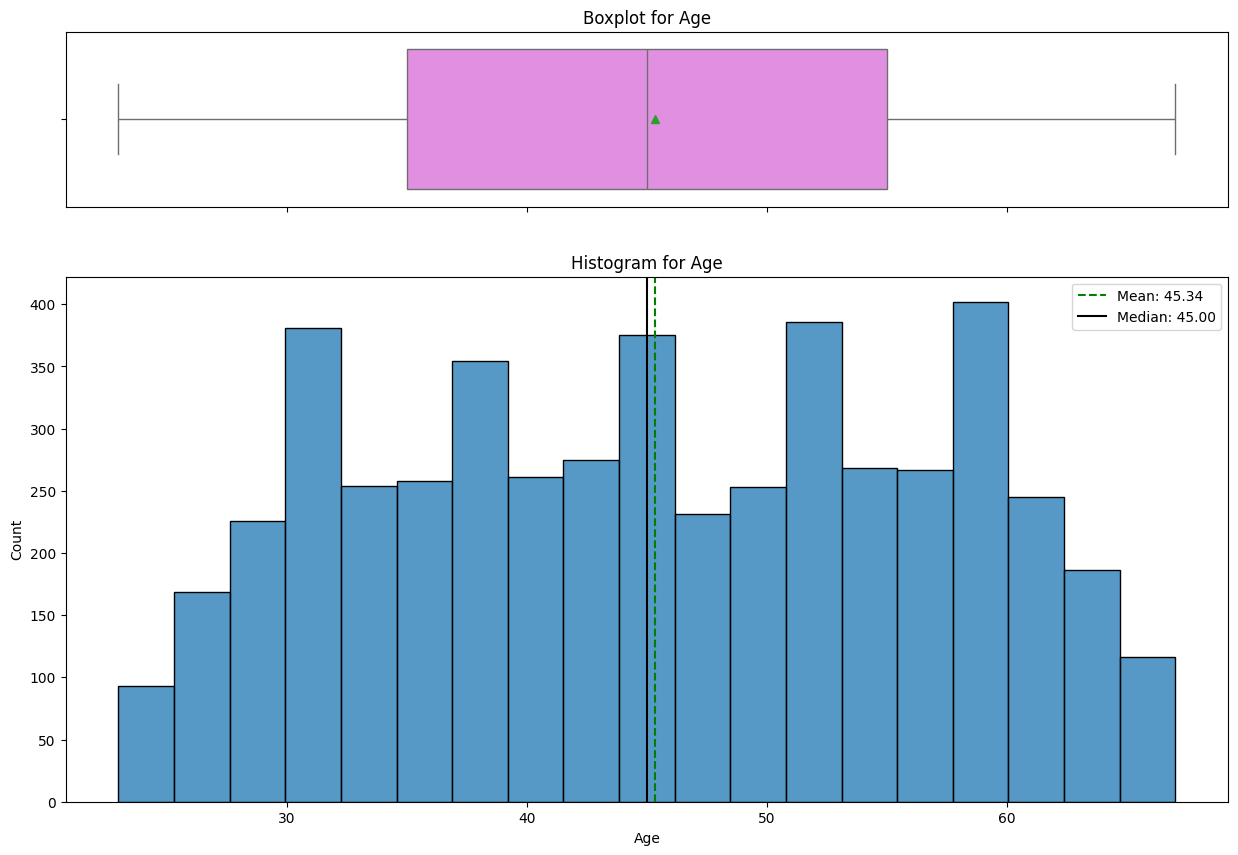

Skewness for Age: -0.03
=_==_==_==_==_==_==_==_==_==_==_==_==_==_==_==_==_==_==_==_==_==_==_==_==_==_==_==_==_==_==_==_==_==_==_==_==_==_==_==_==_==_==_==_==_==_==_==_==_==_= 



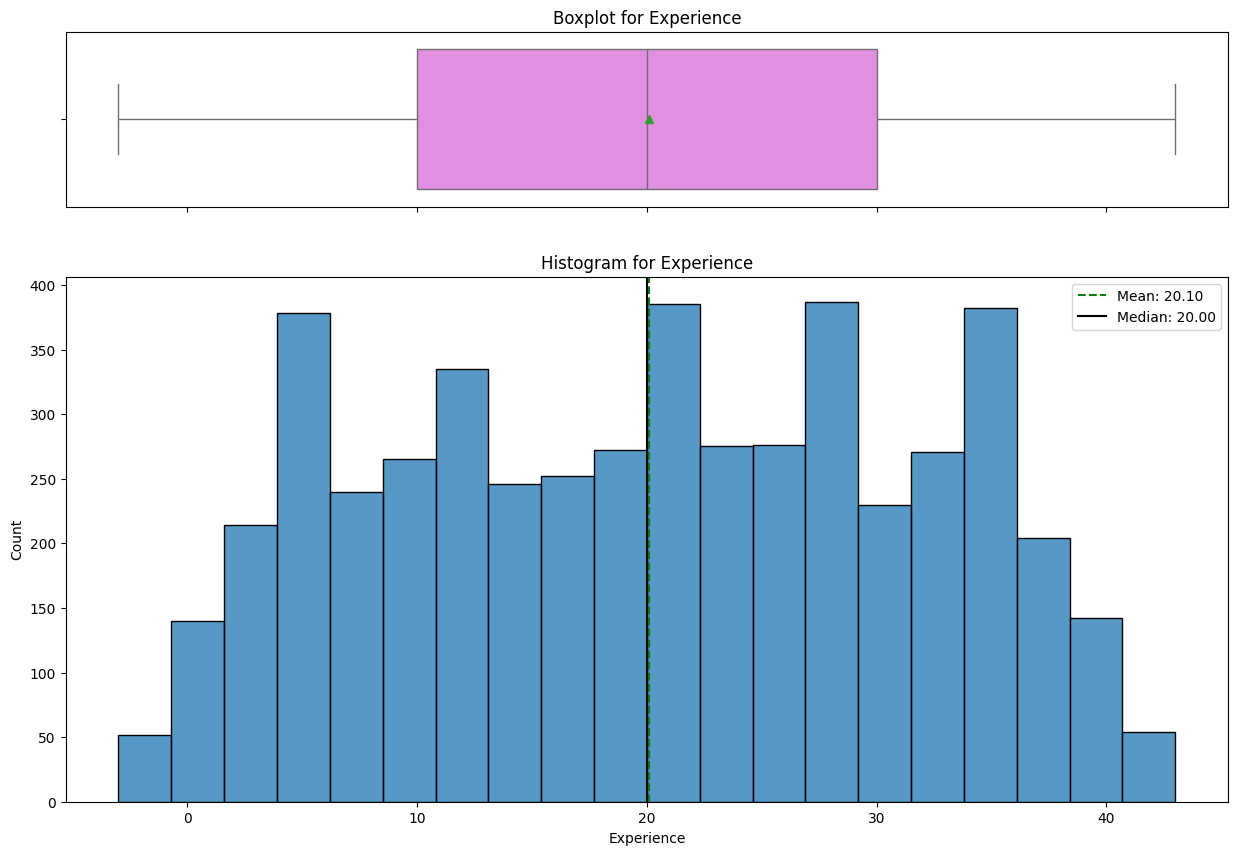

Skewness for Experience: -0.03
=_==_==_==_==_==_==_==_==_==_==_==_==_==_==_==_==_==_==_==_==_==_==_==_==_==_==_==_==_==_==_==_==_==_==_==_==_==_==_==_==_==_==_==_==_==_==_==_==_==_= 



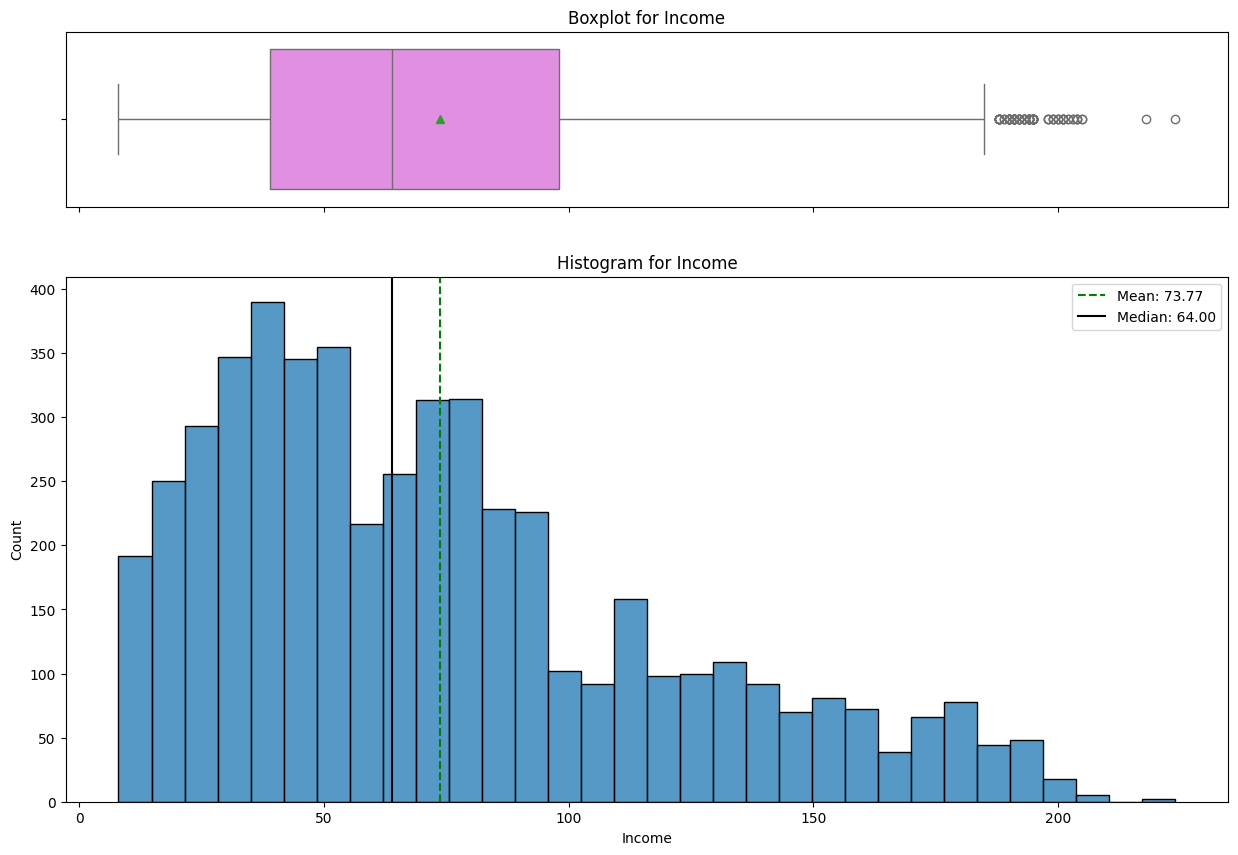

Skewness for Income: 0.84
=_==_==_==_==_==_==_==_==_==_==_==_==_==_==_==_==_==_==_==_==_==_==_==_==_==_==_==_==_==_==_==_==_==_==_==_==_==_==_==_==_==_==_==_==_==_==_==_==_==_= 



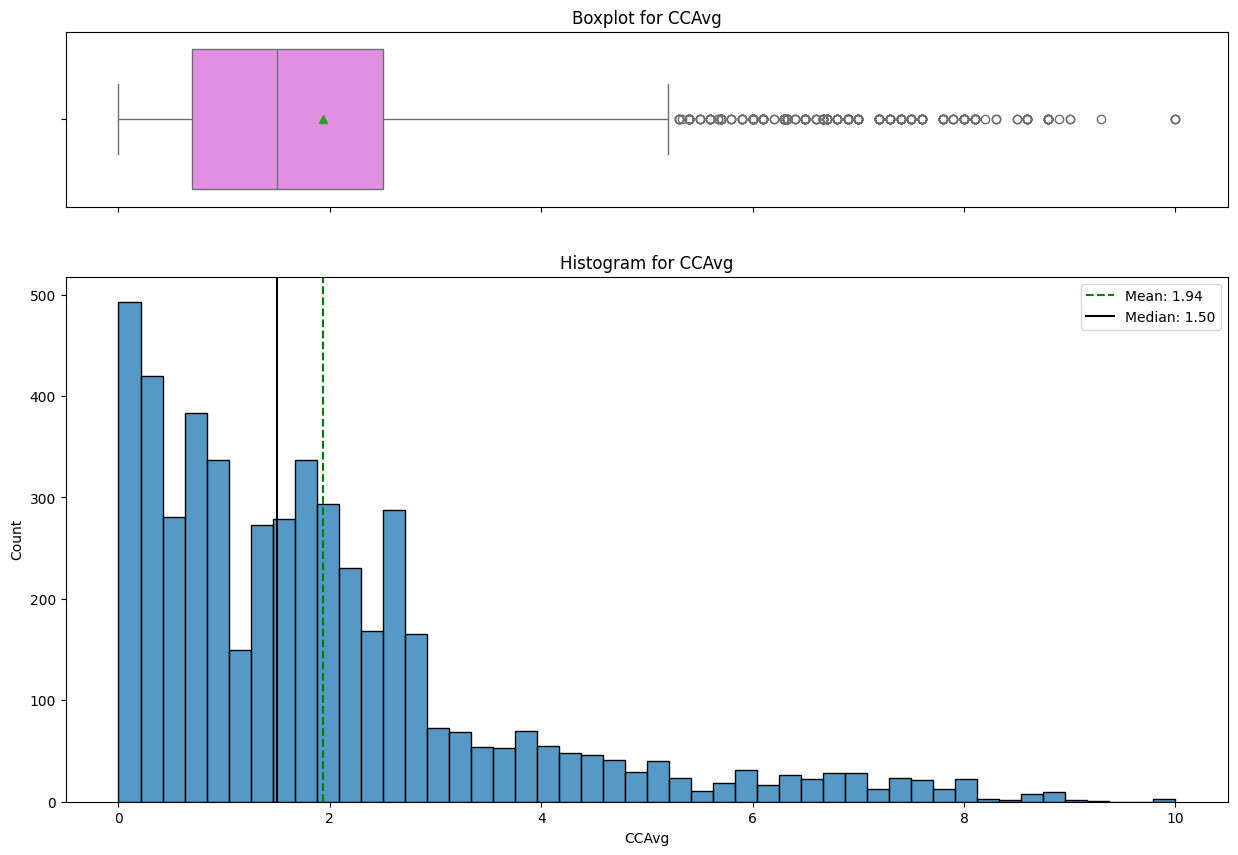

Skewness for CCAvg: 1.60
=_==_==_==_==_==_==_==_==_==_==_==_==_==_==_==_==_==_==_==_==_==_==_==_==_==_==_==_==_==_==_==_==_==_==_==_==_==_==_==_==_==_==_==_==_==_==_==_==_==_= 



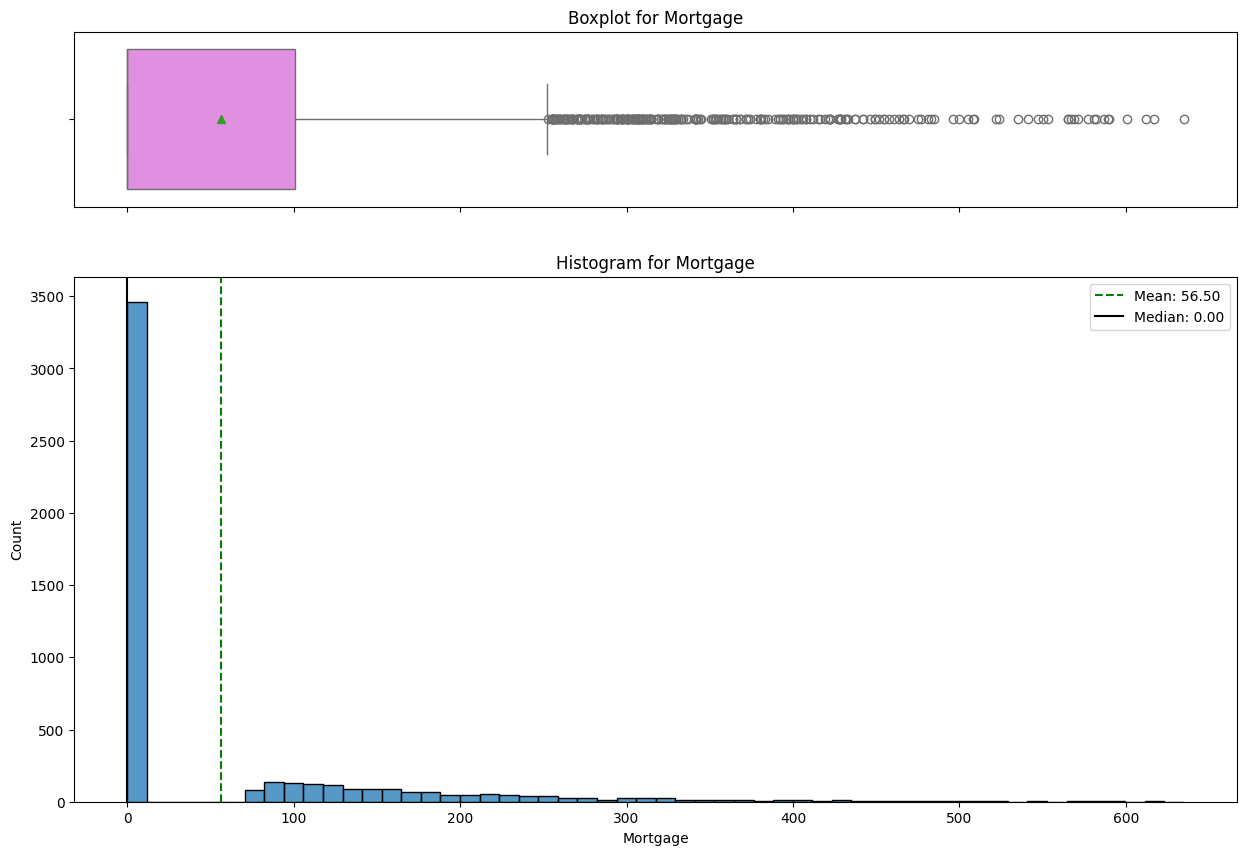

Skewness for Mortgage: 2.10
=_==_==_==_==_==_==_==_==_==_==_==_==_==_==_==_==_==_==_==_==_==_==_==_==_==_==_==_==_==_==_==_==_==_==_==_==_==_==_==_==_==_==_==_==_==_==_==_==_==_= 



In [ ]:
plots_for_outliers = ['Age', 'Experience', 'Income', 'CCAvg', 'Mortgage']
for plot in plots_for_outliers:
    histogram_boxplot(ldata_new1, plot)

### Summary of outliers and Skewness Detection
**Age**
- Skewness for Age: -0.03
- Outliers: None

**Experience**
- Skewness for Experience: -0.03
- Outliers: None

**Income**
- Skewness for Income: 0.84
- Outliers: Quite a few on the high end

**CCAvg**
- skewness for CCAvg: 1.60
- Outliers:  Significant amount on the high end

**Mortgage**
- Skewness for Mortgage: 2.10
- Outliers:  Tremendous amount on the high end

### How we will deal with outliers

- Decision Trees split the data based on feature values, so the precense of outliers can influence the choice of split points

- However, since decision trees focus on minimizing impurities (Gini / entropy) a few outliers won't significantly impact the overall tree.

**There are 2 main methods of dealing with outliers:**

- **Remove Outliers:** Filters out rows with values outside the specified range, reducing the number of rows in the DataFrame.
- **Cap Outliers:** Modifies the values of outliers to fit within the specified range without removing any rows.


**In our case, we do have a lot of outliers so, we will proceed to cap them.** It's also evident from the box plots above that the outliers are all on the high end.  So, we just need to cap the high end.  We'll **cap them to 93%** for
- income
- CCAvg
- Mortgage

*Note:  93% was obtained from Trial and Error. At 94% there were still some outiers.*


** let's write a function to handle this**

1. List of Columns to Cap:

- rows_to_cap = ['Income', 'CCAvg', 'Mortgage'] specifies the columns where you want to cap the upper outliers.

2. Function to Cap Outliers:

- cap_outliers(df, column, cap_value) is a function that caps values in the specified column of the DataFrame df at cap_value.
- It uses np.where to replace values greater than cap_value with cap_value. if not, then put back the value of df[column]

3. Apply Function to Each Column:

- The for loop iterates over each column in rows_to_cap, calculates the 90th percentile value for that column, and applies the cap_outliers function to cap the values.


**explanation for**
```python
np.where(df[column] > cap_value, cap_value, df[column])
```
- if value is > cap_value, replace with cap_value
- if value !> cap_value, then keep the origian value from df[column]

In [ ]:
# create list for rows that we will cap for outliers
rows_to_cap = ['Income', 'CCAvg', 'Mortgage']

# define function for capping
def cap_outliers(df, column, cap_value):
    df[column] = np.where(df[column] > cap_value, cap_value, df[column])
    return df

# apply function to cap outliers
for row in rows_to_cap:
    ldata_new1 = cap_outliers(ldata_new1, row, ldata_new1[row].quantile(0.93))


### Let's look at the plot again for the columns we capped, to veify that outliers have been capped

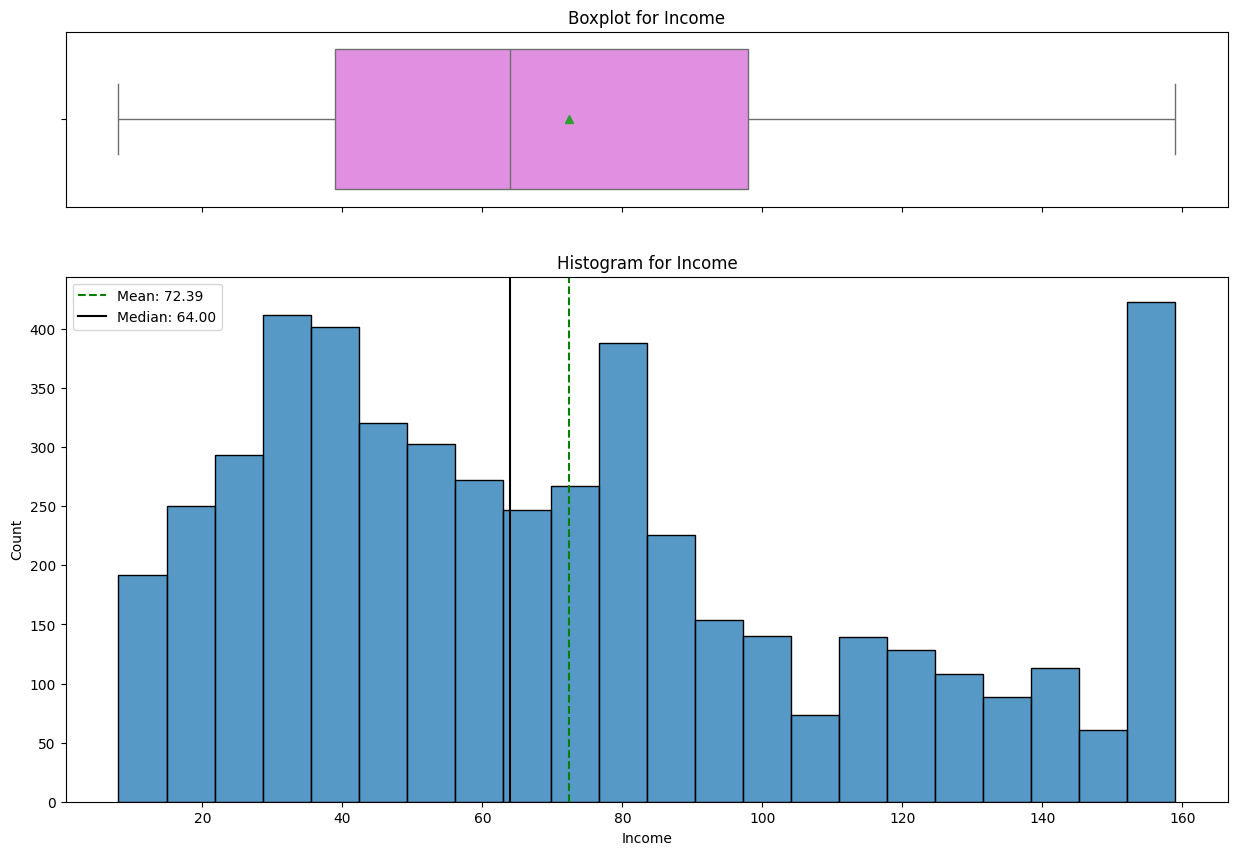

Skewness for Income: 0.61
=_==_==_==_==_==_==_==_==_==_==_==_==_==_==_==_==_==_==_==_==_==_==_==_==_==_==_==_==_==_==_==_==_==_==_==_==_==_==_==_==_==_==_==_==_==_==_==_==_==_= 



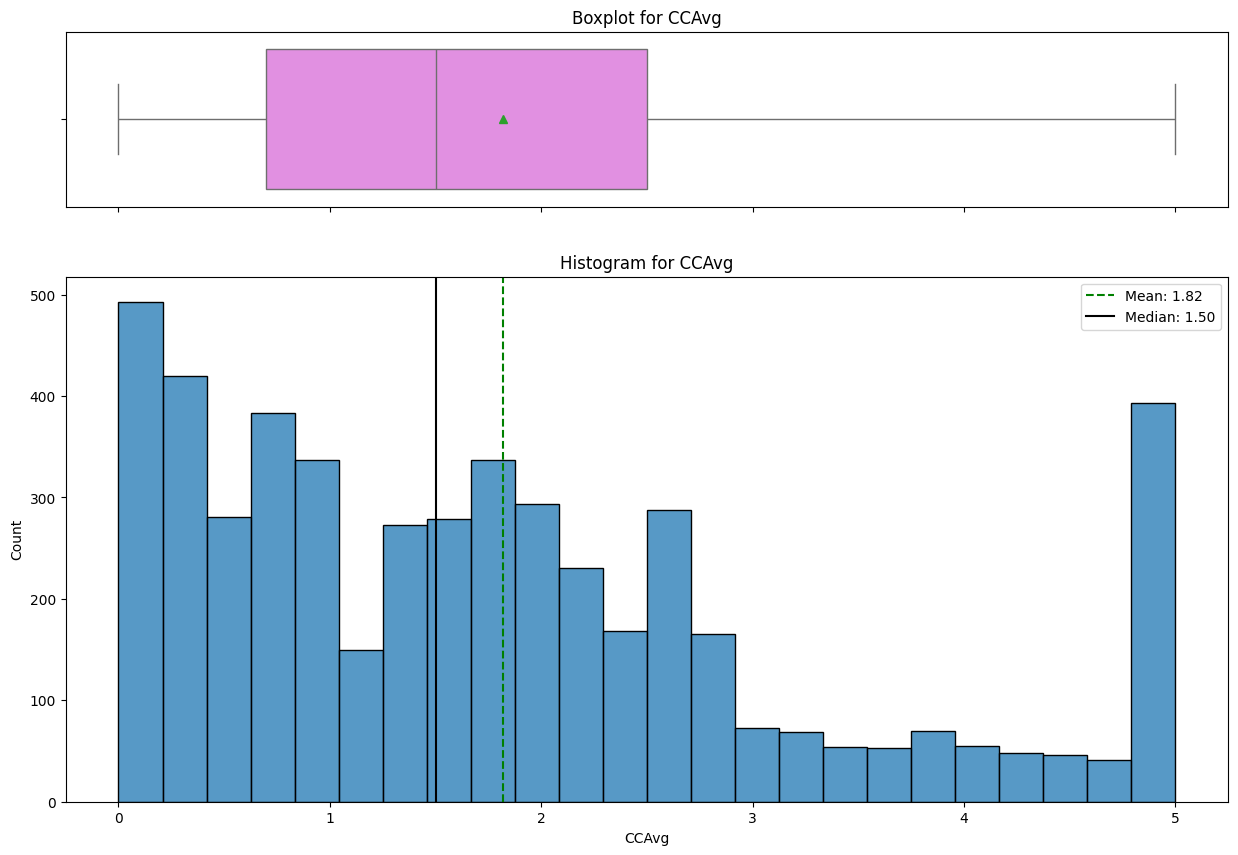

Skewness for CCAvg: 0.86
=_==_==_==_==_==_==_==_==_==_==_==_==_==_==_==_==_==_==_==_==_==_==_==_==_==_==_==_==_==_==_==_==_==_==_==_==_==_==_==_==_==_==_==_==_==_==_==_==_==_= 



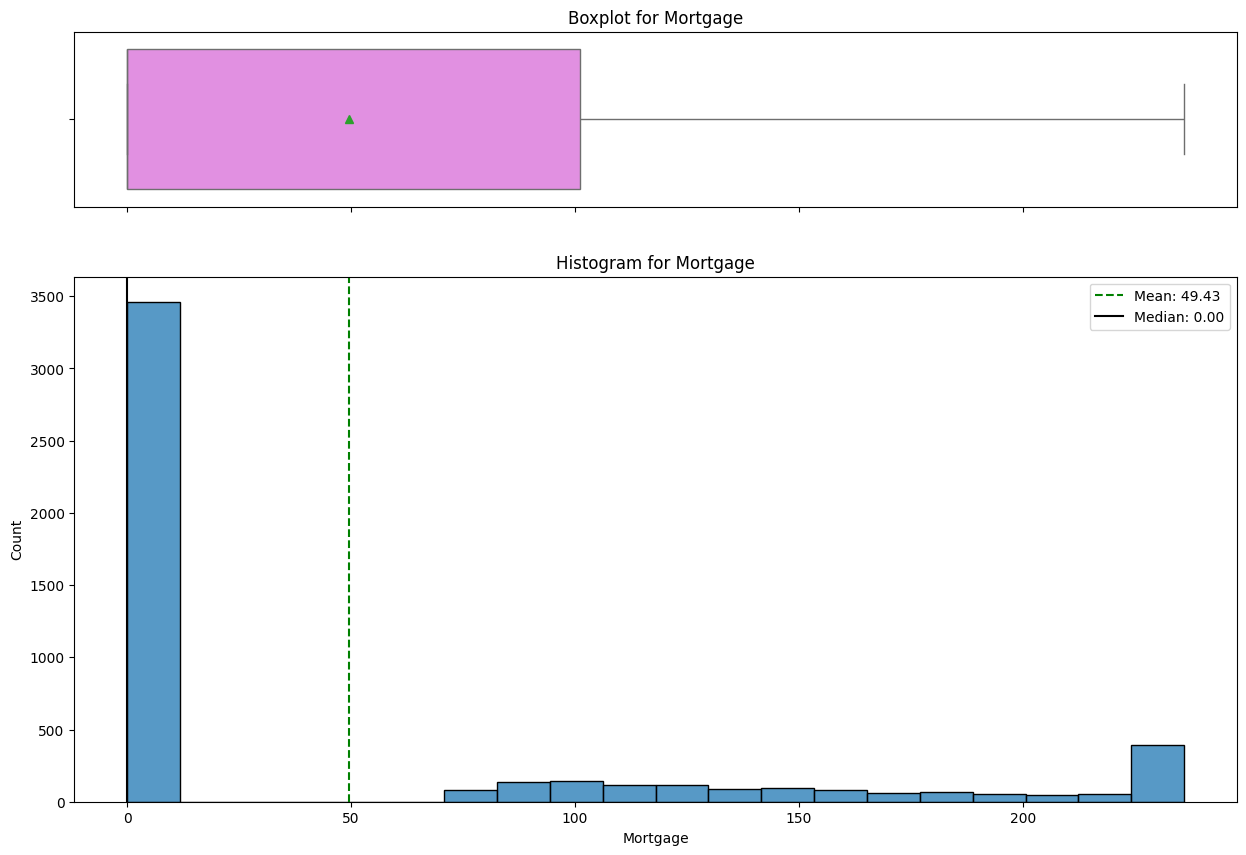

Skewness for Mortgage: 1.29
=_==_==_==_==_==_==_==_==_==_==_==_==_==_==_==_==_==_==_==_==_==_==_==_==_==_==_==_==_==_==_==_==_==_==_==_==_==_==_==_==_==_==_==_==_==_==_==_==_==_= 



In [ ]:
plots_for_outliers = ['Income', 'CCAvg', 'Mortgage']
for plot in plots_for_outliers:
    histogram_boxplot(ldata_new1, plot)

### Summary of outliers and Skewness Detection after capping
**Age**
- Skewness for Age: -0.03
- Outliers: None

**Experience**
- Skewness for Experience: -0.03
- Outliers: None

**Income**
- Skewness for Income: 0.61
- Outliers: None

**CCAvg**
- skewness for CCAvg: 0.86
- Outliers:  None

**Mortgage**
- Skewness for Mortgage: 1.29
- Outliers:  None

---
**Conclusion of capping operation:**
- No more outliers
- skewness has decreased
---

### Let's save and reload the data after capping
- saved as: `Loan_Modelling_with_city_encoded_capped-outliers.csv`
- loaded as: `ldata_capped`


In [ ]:
# save the data after capping
ldata_new1.to_csv('Loan_Modelling_with_city_encoded_capped-outliers.csv', index=False)
ldata_capped=pd.read_csv('Loan_Modelling_with_city_encoded_capped-outliers.csv')
ldata_capped.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard,City
0,25,1,49.0,4,1.6,1,0.0,0,1,0,0,0,148
1,45,19,34.0,3,1.5,1,0.0,0,1,0,0,0,107
2,39,15,11.0,1,1.0,1,0.0,0,0,0,0,0,17
3,35,9,100.0,1,2.7,2,0.0,0,0,0,0,0,179
4,35,8,45.0,4,1.0,2,0.0,0,0,0,0,1,135


## Let's take a look at the stats for the DF now

In [ ]:
# change city to categorical
ldata_capped['City'] = pd.Categorical(ldata_capped['City'])
# see stats
ldata_capped.describe(include='all')

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard,City
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.0
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,245.0
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,107.0
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,375.0
mean,45.338400,20.104600,72.393400,2.396400,1.817618,1.881000,49.434200,0.096000,0.104400,0.06040,0.596800,0.294000,NaN
std,11.463166,11.467954,42.939676,1.147663,1.420930,0.839869,80.487719,0.294621,0.305809,0.23825,0.490589,0.455637,NaN
min,23.000000,-3.000000,8.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,NaN
25%,35.000000,10.000000,39.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,NaN
50%,45.000000,20.000000,64.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000,NaN
75%,55.000000,30.000000,98.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000,NaN


## Model Building

### We are going to try out 2 different ways of building the decision tree and find out what gives us the best results.
1. Pre-Pruning with best parameters (using GSearchCV from sklearn library)
2. Post-Pruning (Cost-Complexity Pruning).  For this case we will use the optimal value of the cost complexity parameter, ccp_alpha to build the decision tree and give us the best results

### Model Building:  Pre-Pruning with best parameters (using GSearchCV from sklearn library)

### Let's separate the dependent and independent variables.
- dependent variable: y: Personal_Loan
- independent variables: X: All the other variables other than Personal_Loan

In [ ]:
# separating out dependent and independent variable
y = ldata_capped['Personal_Loan']
X = ldata_capped.drop('Personal_Loan', axis=1)

### Now let's split the data for Train and Test Set.  
- The split will be 70/30 ration
- random state = 42 ( ref: The Hitchhiker's Guide to the Galaxy)


In [ ]:
# split data for train and test set with random seed of 42
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### We need to decide what evaluation matrix is more pertinent to our case:

**From the project rquirement, let's look at the Objective:**

To predict whether a liability customer will buy personal loans, to understand **which customer attributes are most significant in driving purchases**, and to identify which segment of customers to target more.

**This implies:**
- We want maximum purchases of Loans
- Missing potential customers (false negatives) means lost opportunities for loan sales.
- Cost of missing a potential loan purchaser is high (e.g., lost revenue opportunities).

Given the above, we want to **minimize False Negatives**
- for that reason our focus should be **recall** (which mimimizes False Negatives).

**The Formulae for Recall is:**

${Recall} = \frac{\text{TP}}{\text{TP} + \text{FN}}$

where:
- TP = True Positives
- FN = False Negatives



### Pre-Pruning with best parameters (using GSearchCV from sklearn library)

- Let's import the necessary libraries to do the job

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
#
from sklearn import metrics
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score


* define the hyperparameters for GridSearchCV that we will use:

- **max_depth': np.arange(1,10) :** the depth of the tree will be tested from 1 to 9. The depth of the tree controls how many levels the tree can grow. A shallower tree (lower depth) might underfit the data, while a deeper tree (higher depth) can capture more complexity but might overfit the data.

- **min_samples_leaf: [1, 2, 5, 7, 10, 15, 20] :** The minimum number of samples required to be at a leaf node

- **max_leaf_nodes [2, 3, 5, 10] :** limits the number of leaf nodes the tree can have

- **min_impurity_decrease [0.001, 0.01, 0.1] :** A node will be split if this split induces a decrease in impurity **(Gini impurity or entropy)** greater than or equal to this value

**Note:**

The reason for specifying multiple values for each parameter is to allow GridSearchCV to perform an exhaustive search over all possible combinations of these values. This helps in identifying the optimal set of hyperparameters that yield the best performance for the model on the given data.


In [ ]:
# define the parameters for GridSearchCV that we will use
parameters = {'max_depth': np.arange(1,10),
              'min_samples_leaf': [1, 2, 5, 7, 10, 15, 20],
              'max_leaf_nodes' : [2, 3, 5, 10],
              'min_impurity_decrease': [0.001, 0.01, 0.1]
             }





### Now let's run GridSearchCV

**Explanaton of some parameter values**

1.   **cv=5**

- The dataset is split into 5 parts (folds): Fold 1, Fold 2, Fold 3, Fold 4, Fold 5.

**Training & Validation**

- Iteration 1: Train on Fold 2, Fold 3, Fold 4, Fold 5; Validate on Fold 1.
- Iteration 2: Train on Fold 1, Fold 3, Fold 4, Fold 5; Validate on Fold 2.
- Iteration 3: Train on Fold 1, Fold 2, Fold 4, Fold 5; Validate on Fold 3.
- Iteration 4: Train on Fold 1, Fold 2, Fold 3, Fold 5; Validate on Fold 4.
- Iteration 5: Train on Fold 1, Fold 2, Fold 3, Fold 4; Validate on Fold 5.



2.   **n_jobs=-1**

- This parameter specifies the number of jobs (threads) to run in parallel for the grid search.
- n_jobs=-1 means that all available processors will be used. This can significantly speed up the computation, especially when the grid search is extensive with many combinations of hyperparameters.
- Utilizing multiple processors makes the grid search faster because it allows parallel computation, where multiple tasks are processed simultaneously.

3. **grid_search.fit(X_train, y_train)**
- training/fitting is always done on the training data
- we'll save the optimized model (based on recall score) as `best-estimator`



In [ ]:
%%time
# Initialize the DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=42)


# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=clf, param_grid=parameters, scoring='recall', cv=5, n_jobs=-1, verbose=1)

# fit the data, determine the best hyperparameters for your model.
grid_search.fit(X_train, y_train)


# find the best estimator as a result of running grid_search.fit
best_estimator = grid_search.best_estimator_

# Fit the best estimator on the training data. i.e. Train the model.  Identifies patterns and relationships in the training data to build a predictive model
best_estimator.fit(X_train, y_train)


# Get some intersting output from GridSearch
print('\n\n')
#
print(f"Best parameters found 'best_params_': {grid_search.best_params_} \n")
print(f"Best estimator 'best_estimator_': {grid_search.best_estimator_} \n")
print(f"Best Recall score 'best_score_': {grid_search.best_score_} \n")





Fitting 5 folds for each of 756 candidates, totalling 3780 fits



Best parameters found 'best_params_': {'max_depth': 4, 'max_leaf_nodes': 10, 'min_impurity_decrease': 0.001, 'min_samples_leaf': 15} 

Best estimator 'best_estimator_': DecisionTreeClassifier(max_depth=4, max_leaf_nodes=10,
                       min_impurity_decrease=0.001, min_samples_leaf=15,
                       random_state=42) 

Best Recall score 'best_score_': 0.8452403846153846 

CPU times: user 2.31 s, sys: 126 ms, total: 2.43 s
Wall time: 34.1 s


### Model Evaluation Criterion

### Now that we have a trained model, we will make predictions and observe the scores for both training and testing data


In [ ]:

# Calculate evaluation metrics for the training set
y_train_pred = best_estimator.predict(X_train) # first Use the best estimator to predict on the training set
train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred)
train_recall = recall_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred)



# Calculate evaluation metrics for the testing set
y_test_pred = best_estimator.predict(X_test) # first Use the best estimator to predict on the testing set
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)


# Create a DataFrame to store the metrics
metrics = {
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
    'Training Set': [train_accuracy, train_precision, train_recall, train_f1],
    'Test Set': [test_accuracy, test_precision, test_recall, test_f1],
    # 'percentage_customers_predicted_to_buy_loan': [train_percentage_positive_predictions, test_percentage_positive_predictions]
}

## Let's also try to find out what percentage of customers are predicted to by a loan for trainset
train_num_positive_predictions = sum(y_train_pred == 1)
train_total_instances = len(y_train)
train_percentage_positive_predictions = (train_num_positive_predictions / train_total_instances) * 100

## Let's also try to find out what percentage of customers are predicted to by a loan for test set
test_num_positive_predictions = sum(y_test_pred == 1)
test_total_instances = len(y_test)
test_percentage_positive_predictions = (test_num_positive_predictions / test_total_instances) * 100

print(f"percentage_customers_predicted_to_buy_loan from training Set Data: {train_percentage_positive_predictions}")
print(f"percentage_customers_predicted_to_buy_loan from testing Set Data: {test_percentage_positive_predictions}")

df_metrics = pd.DataFrame(metrics)
df_metrics.set_index('Metric', inplace=True)

df_metrics


percentage_customers_predicted_to_buy_loan from training Set Data: 8.342857142857143
percentage_customers_predicted_to_buy_loan from testing Set Data: 9.6


,Training Set,Test Set
Metric,,
Accuracy,0.982571,0.982000
Precision,0.948630,0.951389
Recall,0.857585,0.872611
F1 Score,0.900813,0.910299


### Observations:
- High Accuracy on both Training and Test
- High Recall on both Training and Test

### Create Confusion Matrix Function

### Let's create a function for printing out confusion Matrix, since we will use this often

In [ ]:
from sklearn import metrics

## Function to create confusion matrix
def make_confusion_matrix(model,X_train_or_test, y_actual,labels=[1, 0]):
    '''
    model : classifier to predict values of X
    y_actual : ground truth

    '''
    y_predict = model.predict(X_train_or_test)
    cm=metrics.confusion_matrix( y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - No","Actual - Yes"]],
                  columns = [i for i in ['Predicted - No','Predicted - Yes']])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=labels,fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

#### Create Confusion Matix for Train Data

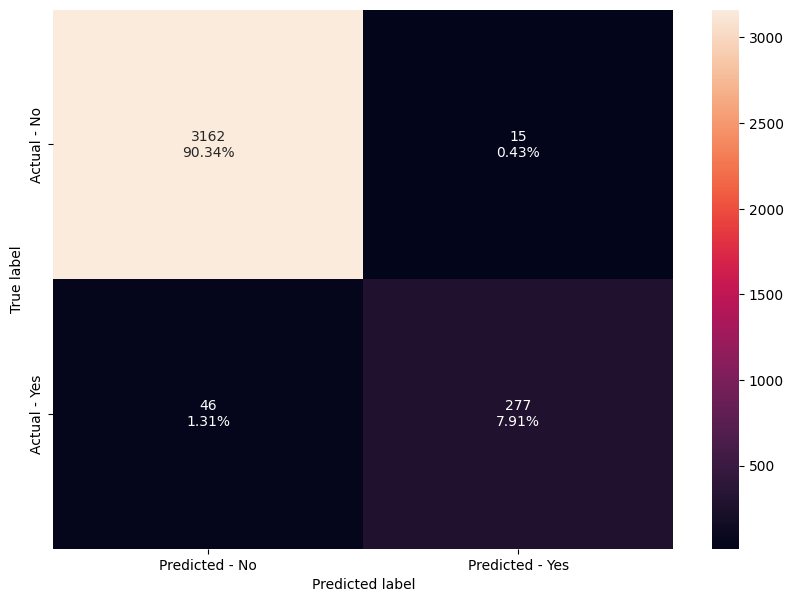

In [ ]:
make_confusion_matrix(best_estimator,X_train, y_train)

#### Maulally Calculate the Recall for Train Data

## ${Recall} = \frac{\text{TP}}{\text{TP} + \text{FN}}$

In [ ]:
277/(277+46)

0.8575851393188855

#### Create Confusion Matix for Test Data

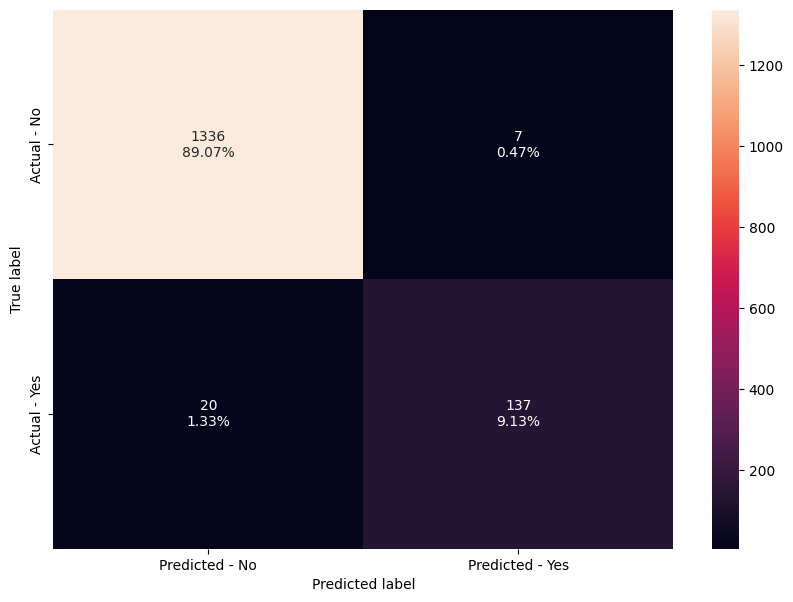

In [ ]:
make_confusion_matrix(best_estimator,X_test, y_test)

#### Maulally Calculate the Recall for Test Data

## ${Recall} = \frac{\text{TP}}{\text{TP} + \text{FN}}$

In [ ]:
137/(137+20)

0.8726114649681529

**Observations:**
Recall score matches up with what is obtained earlier from scikit functions

## Let's view which features are more important
- The importance of a feature is computed as the (normalized) total reduction of the 'criterion' brought by that feature.
- It is also known as the Gini importance

In [ ]:
print (pd.DataFrame(best_estimator.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                         Imp
Education           0.431106
Income              0.345731
Family              0.186465
CCAvg               0.036698
Age                 0.000000
Experience          0.000000
Mortgage            0.000000
Securities_Account  0.000000
CD_Account          0.000000
Online              0.000000
CreditCard          0.000000
City                0.000000


### Let's visualize important features

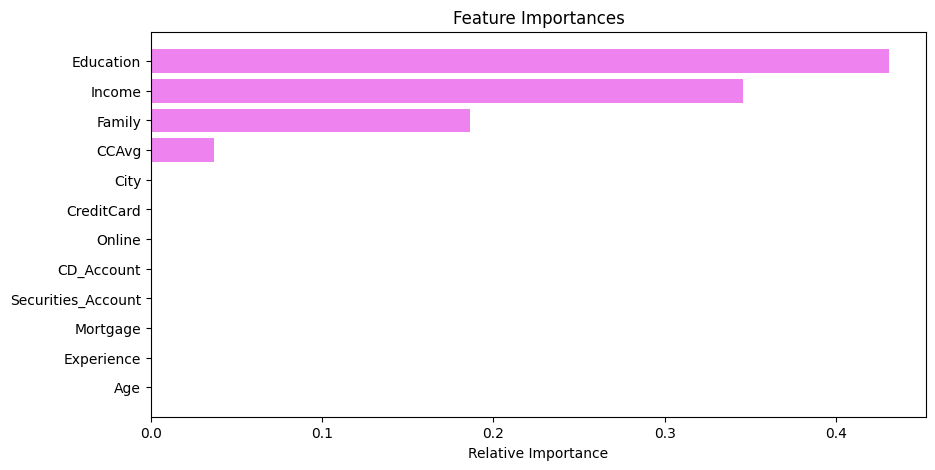

In [ ]:
importances = best_estimator.feature_importances_
indices = np.argsort(importances)
feature_names = list(X.columns)

plt.figure(figsize=(10,5))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

### It seems like the important features are (in order of importance):
- Education
- Income
- Family
- CCAvg

All other features have no bearing on Loan Purchase

### Visualizing the decision tree

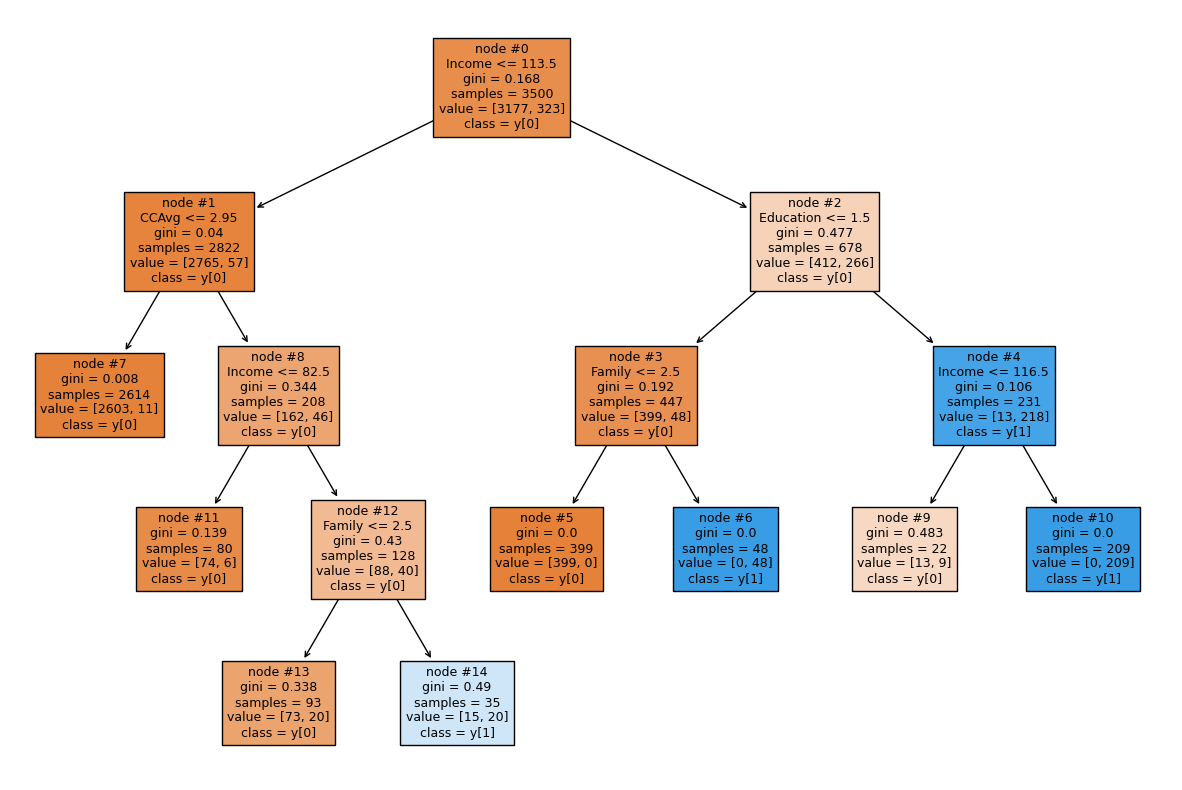

In [ ]:
plt.figure(figsize=(15,10))

tree.plot_tree(best_estimator,feature_names=feature_names,filled=True,fontsize=9,node_ids=True,class_names=True)
plt.show()

### do a text based report

In [ ]:
# Text report showing the rules of a decision tree -

print(tree.export_text(best_estimator,feature_names=feature_names,show_weights=True))

|--- Income <= 113.50
|   |--- CCAvg <= 2.95
|   |   |--- weights: [2603.00, 11.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- Income <= 82.50
|   |   |   |--- weights: [74.00, 6.00] class: 0
|   |   |--- Income >  82.50
|   |   |   |--- Family <= 2.50
|   |   |   |   |--- weights: [73.00, 20.00] class: 0
|   |   |   |--- Family >  2.50
|   |   |   |   |--- weights: [15.00, 20.00] class: 1
|--- Income >  113.50
|   |--- Education <= 1.50
|   |   |--- Family <= 2.50
|   |   |   |--- weights: [399.00, 0.00] class: 0
|   |   |--- Family >  2.50
|   |   |   |--- weights: [0.00, 48.00] class: 1
|   |--- Education >  1.50
|   |   |--- Income <= 116.50
|   |   |   |--- weights: [13.00, 9.00] class: 0
|   |   |--- Income >  116.50
|   |   |   |--- weights: [0.00, 209.00] class: 1



### Model Building Post-Pruning (Cost-Complexity Pruning).
- For this case we will use the optimal value of the cost complexity parameter, ccp_alpha to build the decision tree and give us the best results

The DecisionTreeClassifier provides parameters such as min_samples_leaf and max_depth to prevent a tree from overfiting. Cost complexity pruning provides another option to control the size of a tree. In DecisionTreeClassifier, this pruning technique is parameterized by the cost complexity parameter, ccp_alpha. Greater values of ccp_alpha increase the number of nodes pruned.


Total impurity of leaves vs effective alphas of pruned tree
---------------------------------------------------------------
Minimal cost complexity pruning recursively finds the node with the "weakest
link". The weakest link is characterized by an effective alpha, where the
nodes with the smallest effective alpha are pruned first. To get an idea of
what values of ``ccp_alpha`` could be appropriate.

-  scikit-learn provide `DecisionTreeClassifier.cost_complexity_pruning_path` that returns the **effective alphas** and the corresponding **total leaf impurities** at each step of
the pruning process.
- As alpha increases, more of the tree is pruned, which
increases the total impurity of its leaves.

In [ ]:
clf = DecisionTreeClassifier(random_state=42)
path = clf.cost_complexity_pruning_path(X_train, y_train) # creates a dictionary with key of alphas and impurities.  the values are arrays
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [ ]:
pd.DataFrame(path).head() # view the dictionary as a DF

,ccp_alphas,impurities
0,0.000000,0.000000
1,0.000245,0.000490
2,0.000271,0.001031
3,0.000279,0.001589
4,0.000281,0.002152


## Drawing a line plot

- creates a line plot with steps and markers to visualize the relationship between the cost complexity pruning parameter (ccp_alpha) and the total impurity of the decision tree leaves.

Let's break down the components and the type of plot this is.

```python
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
```
- ccp_alphas[:-1]: This slices the ccp_alphas array to exclude the last element, which is often the alpha value for the root-only tree.

- impurities[:-1]: Similarly, this slices the impurities array to match the alpha values being plotted.

- marker='o': This adds circular markers at each data point.

- drawstyle="steps-post": This sets the drawing style to "steps-post", which means the steps are drawn at the x-values and then jump to the next y-value, creating a step-like appearance.

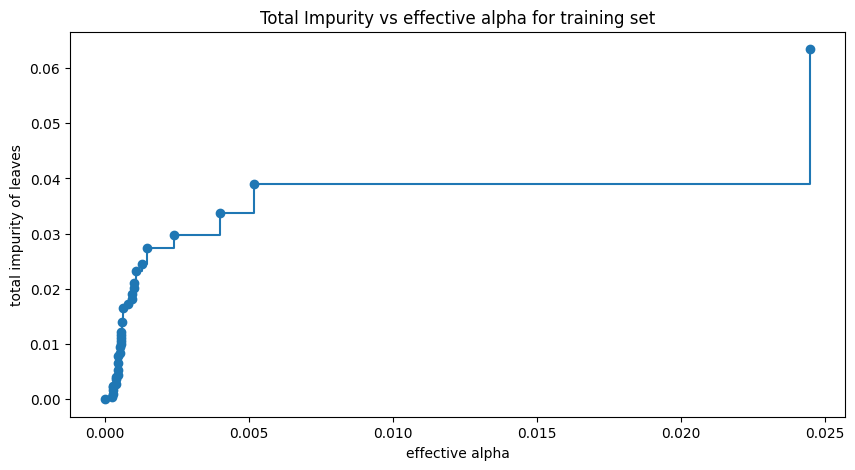

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

### **Observtion:**

- as alpha grows (tree becomes less complex) the impurity grows also
- after alpha value of 0.005 the impurity starts to flatten.  i.e increasing alpah after this does not give you much benefit for making a simpler model.

### Explore Different Pruning Levels:

- By training decision tree classifiers with different values of ccp_alpha, you explore a range of pruning levels from no pruning to very aggressive pruning.
- This helps in understanding how the complexity of the tree (controlled by pruning) affects its performance.

- we train a decision tree using the effective alphas. The last value in ccp_alphas is the alpha value that prunes the whole tree, leaving the tree, clfs[-1], with one node.

In [ ]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=42, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
      clfs[-1].tree_.node_count, ccp_alphas[-1]))

Number of nodes in the last tree is: 1 with ccp_alpha: 0.05206542558865251


For the remainder, we remove the last element in
``clfs`` and ``ccp_alphas``, because it is the trivial tree with only one
node. Here we show that the number of nodes and tree depth decreases as alpha
increases.

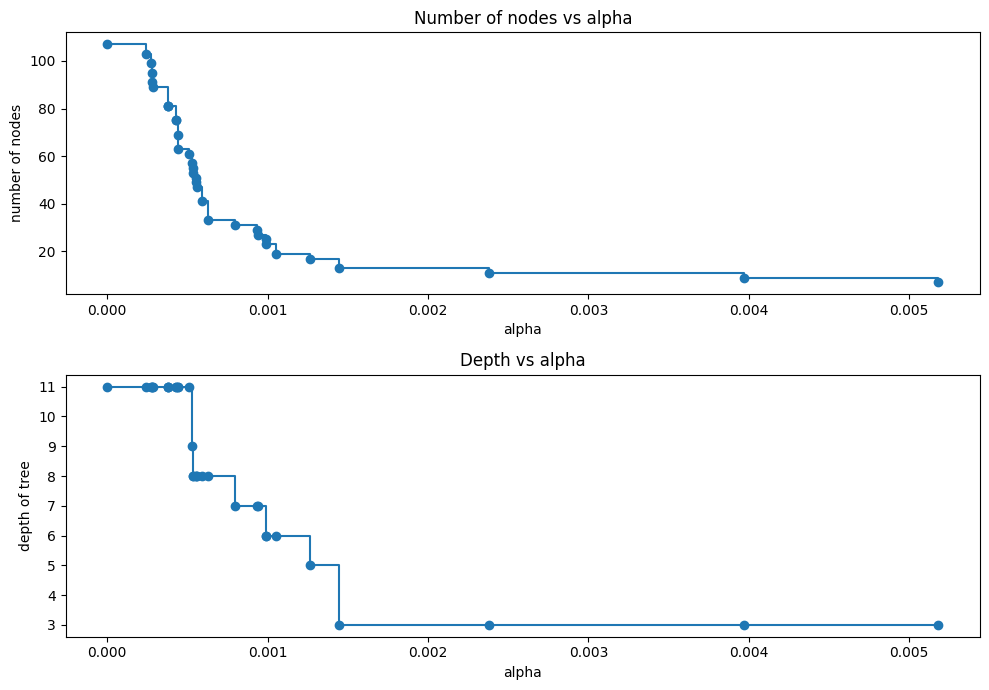

In [ ]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1,figsize=(10,7))
ax[0].plot(ccp_alphas, node_counts, marker='o', drawstyle="steps-post") # <-- 1st [plot] alphas vs. node_counts
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker='o', drawstyle="steps-post") # <-- 2nd [plot], alphas vs. depth
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

Accuracy vs alpha for training and testing sets
----------------------------------------------------
When ``ccp_alpha`` is set to zero and keeping the other default parameters
of `DecisionTreeClassifier`, the tree overfits, leading to
a 100% training accuracy and 98% testing accuracy. As alpha increases, more
of the tree is pruned, thus creating a decision tree that generalizes better.

In [ ]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

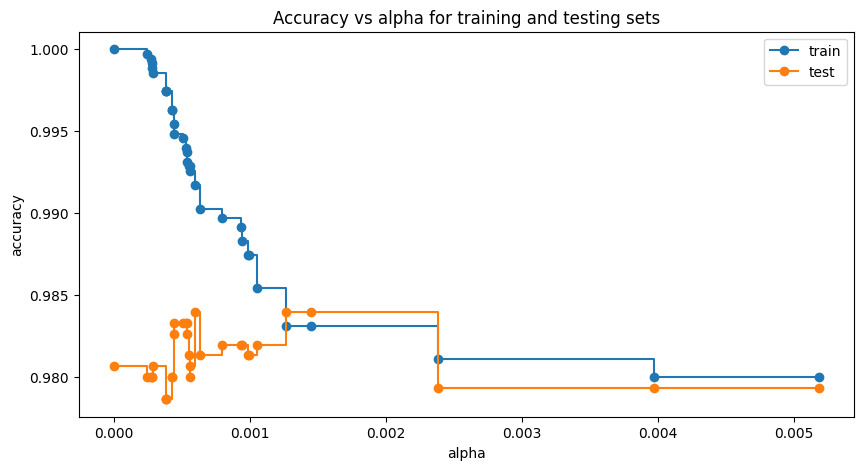

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

### Finding the best_model based on accuracy score

In [ ]:
index_best_model = np.argmax(test_scores)
best_model = clfs[index_best_model]
print(best_model)
print('Training accuracy of best model: ',best_model.score(X_train, y_train))
print('Test accuracy of best model: ',best_model.score(X_test, y_test))

DecisionTreeClassifier(ccp_alpha=0.0005936157454184019, random_state=42)
Training accuracy of best model:  0.9917142857142857
Test accuracy of best model:  0.984


## Model Performance Improvement

#### Since accuracy isn't the right metric for our data we would want high recall

In [ ]:
recall_train=[]
for clf in clfs:
    pred_train3=clf.predict(X_train)
    values_train=metrics.recall_score(y_train,pred_train3)
    recall_train.append(values_train)

In [ ]:
recall_test=[]
for clf in clfs:
    pred_test3=clf.predict(X_test)
    values_test=metrics.recall_score(y_test,pred_test3)
    recall_test.append(values_test)

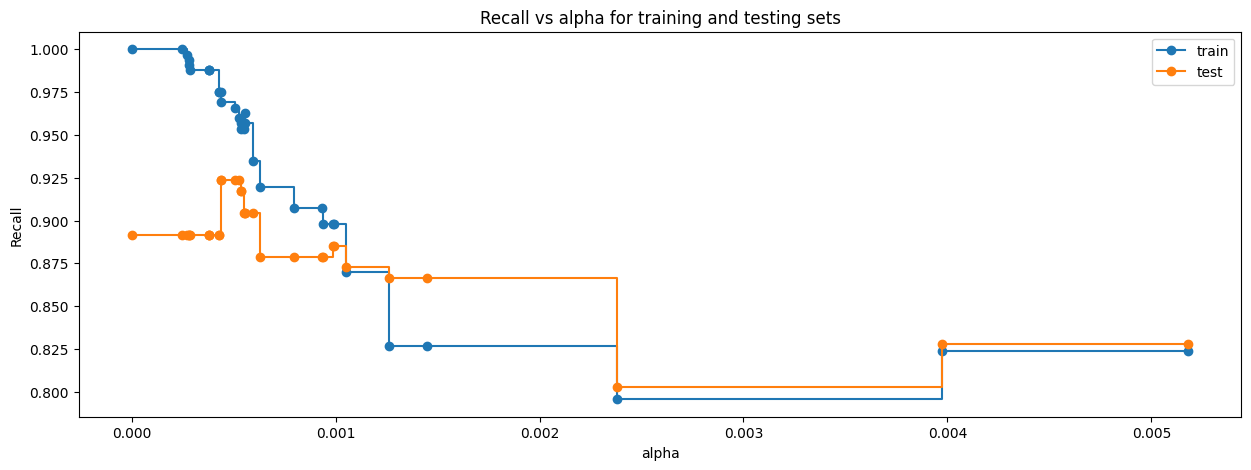

In [ ]:
fig, ax = plt.subplots(figsize=(15,5))
ax.set_xlabel("alpha")
ax.set_ylabel("Recall")
ax.set_title("Recall vs alpha for training and testing sets")
ax.plot(ccp_alphas, recall_train, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, recall_test, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

### Finding the best model based on recall score

In [ ]:
# creating the model where we get highest train and test recall
index_best_model = np.argmax(recall_test)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(ccp_alpha=0.0004395604395604396, random_state=42)


## Confusion Matrix - post-pruned decision tree

### Confusion Matrix for test data set

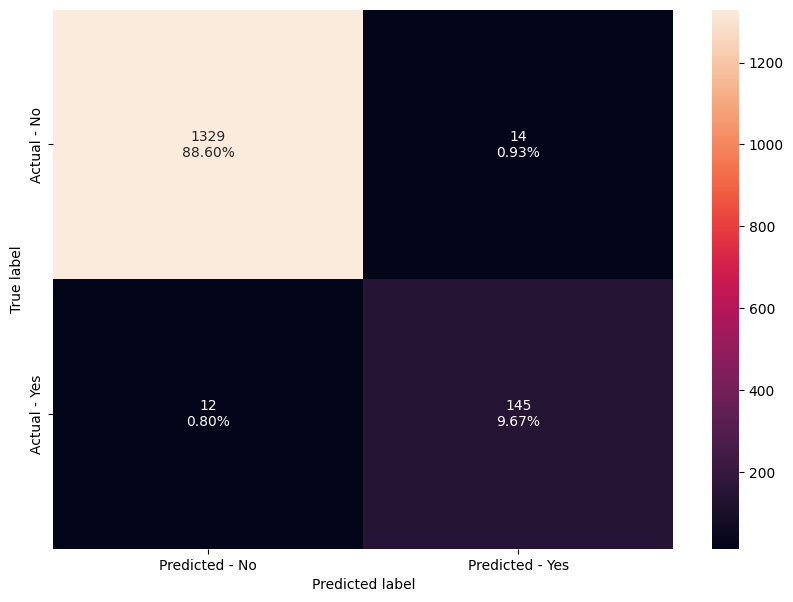

In [ ]:
make_confusion_matrix(best_model,X_test, y_test)

### calculating the recall score for best_model by observing the confusion matrix for test data set

In [ ]:
145/(145+12)

0.9235668789808917

### Confusion Matrix for train data set

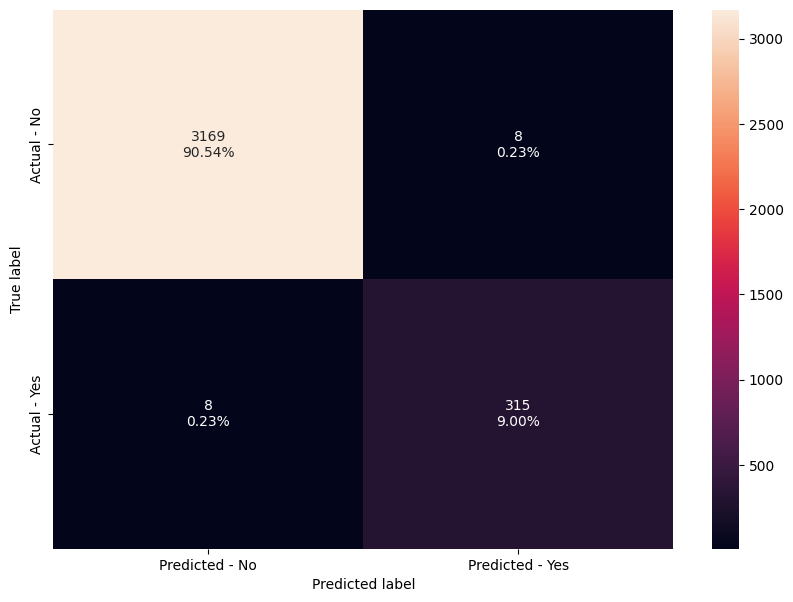

In [ ]:
make_confusion_matrix(best_model,X_train, y_train)

### calculating the recall score for best_model by observing the confusion matrix for train data set

In [ ]:
315/(315+8)

0.9752321981424149

### Showing the recall score using sklearn metrics

In [ ]:
from sklearn import metrics
##  Function to calculate recall score
def get_recall_score(model):
    '''
    model : classifier to predict values of X

    '''
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    print("Recall on training set : ",metrics.recall_score(y_train,pred_train))
    print("Recall on test set : ",metrics.recall_score(y_test,pred_test))

In [ ]:
# Recall on train and test
get_recall_score(best_model)

Recall on training set :  0.9752321981424149
Recall on test set :  0.9235668789808917


**Observation**
- the recall scores calculated manually using confusion matrix output matches those given by sklearn metrics

- Recall on training set :  0.9752321981424149
- Recall on test set :  0.9235668789808917

- With post-pruning we get the highest recall on both training and test set

### Visualizing the Decision Tree

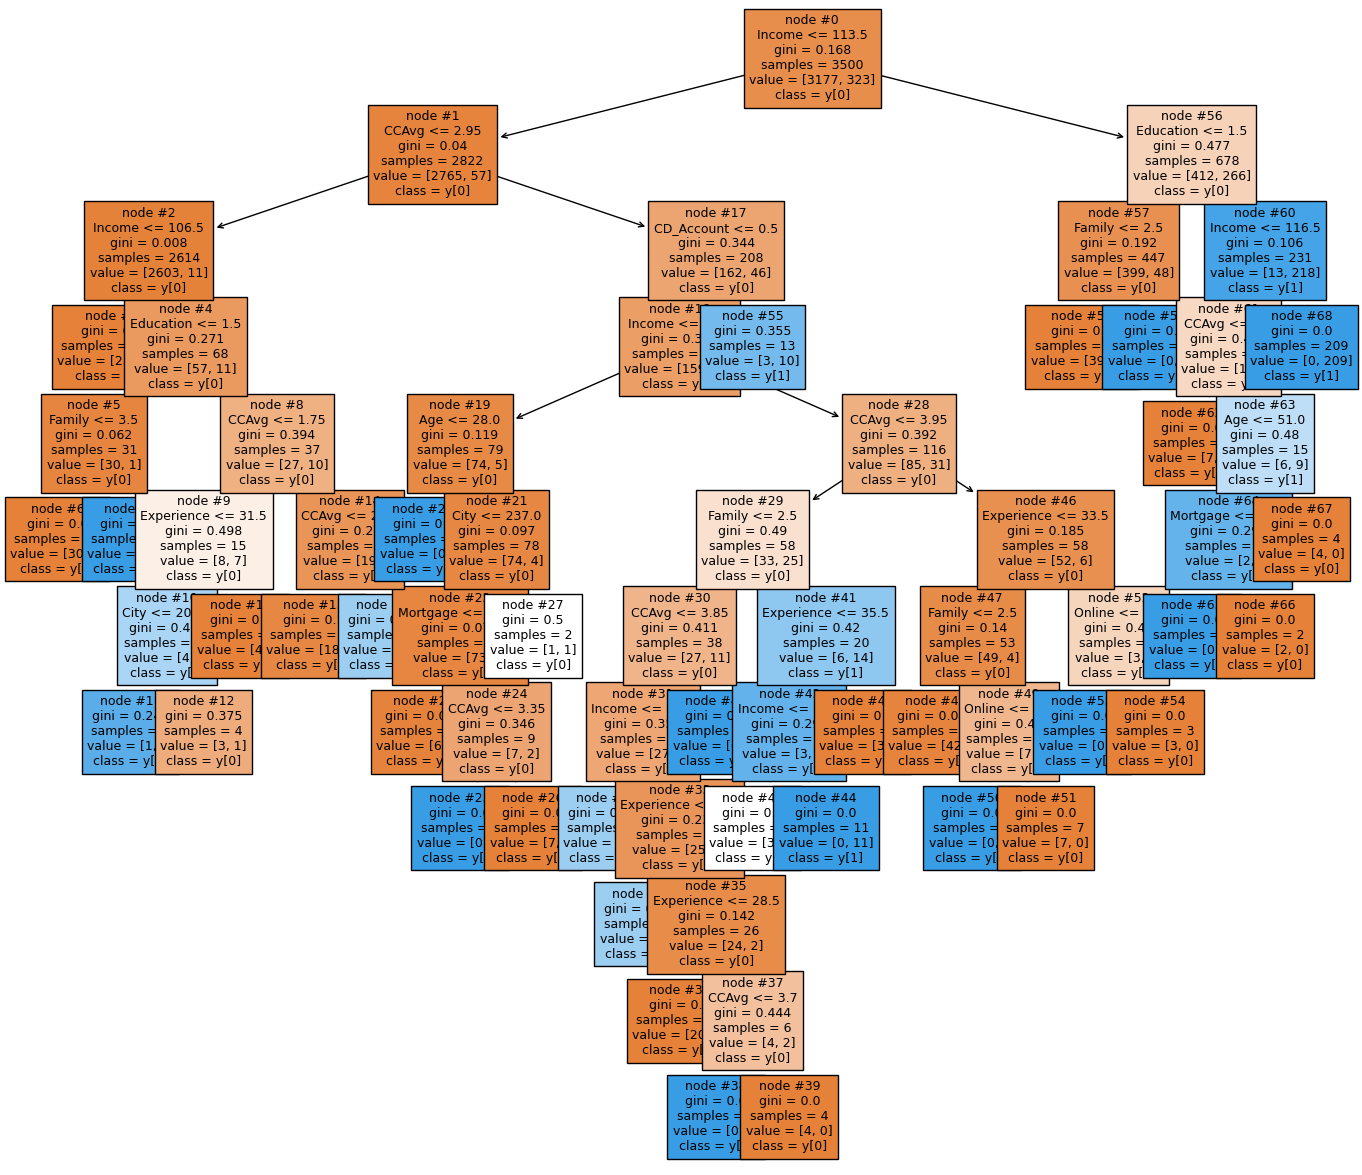

In [ ]:
plt.figure(figsize=(17,15))

tree.plot_tree(best_model,feature_names=feature_names,filled=True,fontsize=9,node_ids=True,class_names=True)
plt.show()

###  Text report showing the rules of a decision tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier, export_text
# Text report showing the rules of a decision tree -

tree_rules = export_text(best_model, feature_names=list(X_train.columns))
print(tree_rules)

|--- Income <= 113.50
|   |--- CCAvg <= 2.95
|   |   |--- Income <= 106.50
|   |   |   |--- class: 0
|   |   |--- Income >  106.50
|   |   |   |--- Education <= 1.50
|   |   |   |   |--- Family <= 3.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- Family >  3.50
|   |   |   |   |   |--- class: 1
|   |   |   |--- Education >  1.50
|   |   |   |   |--- CCAvg <= 1.75
|   |   |   |   |   |--- Experience <= 31.50
|   |   |   |   |   |   |--- City <= 207.50
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- City >  207.50
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- Experience >  31.50
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |--- CCAvg >  1.75
|   |   |   |   |   |--- CCAvg <= 2.45
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- CCAvg >  2.45
|   |   |   |   |   |   |--- class: 1
|   |--- CCAvg >  2.95
|   |   |--- CD_Account <= 0.50
|   |   |   |--- Income <= 82.50
|   |   |   |   |--- Age <= 28.00
|   |   |   |

### Print out a classification report for test data prediction


In [ ]:
from sklearn.metrics import classification_report
# Make predictions on the test set
y_test_pred_PP = best_model.predict(X_test)

# Print the classification report
print(classification_report(y_test, y_test_pred_PP))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1343
           1       0.91      0.92      0.92       157

    accuracy                           0.98      1500
   macro avg       0.95      0.96      0.95      1500
weighted avg       0.98      0.98      0.98      1500



### Interpretation
- High Precision and Recall for Class 0: The model performs very well in predicting the negative class (class 0), with both precision and recall at 0.99.
- Good Precision and Recall for Class 1: The model also performs well in predicting the positive class (class 1), with precision at 0.91 and recall at 0.92.
- Overall Performance: The model has an overall accuracy of 0.98, which indicates excellent performance. The macro and weighted averages are also high, reflecting the model's robustness across both classes.

### Finding out which features are important

In [ ]:
# importance of features in the tree building ( The importance of a feature is computed as the
#(normalized) total reduction of the 'criterion' brought by that feature. It is also known as the Gini importance )

print (pd.DataFrame(best_model.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                         Imp
Education           0.381545
Income              0.314878
Family              0.165577
CCAvg               0.072351
Experience          0.017205
CD_Account          0.014787
Online              0.011715
Age                 0.010125
Mortgage            0.007019
City                0.004798
Securities_Account  0.000000
CreditCard          0.000000


### visualizing important features

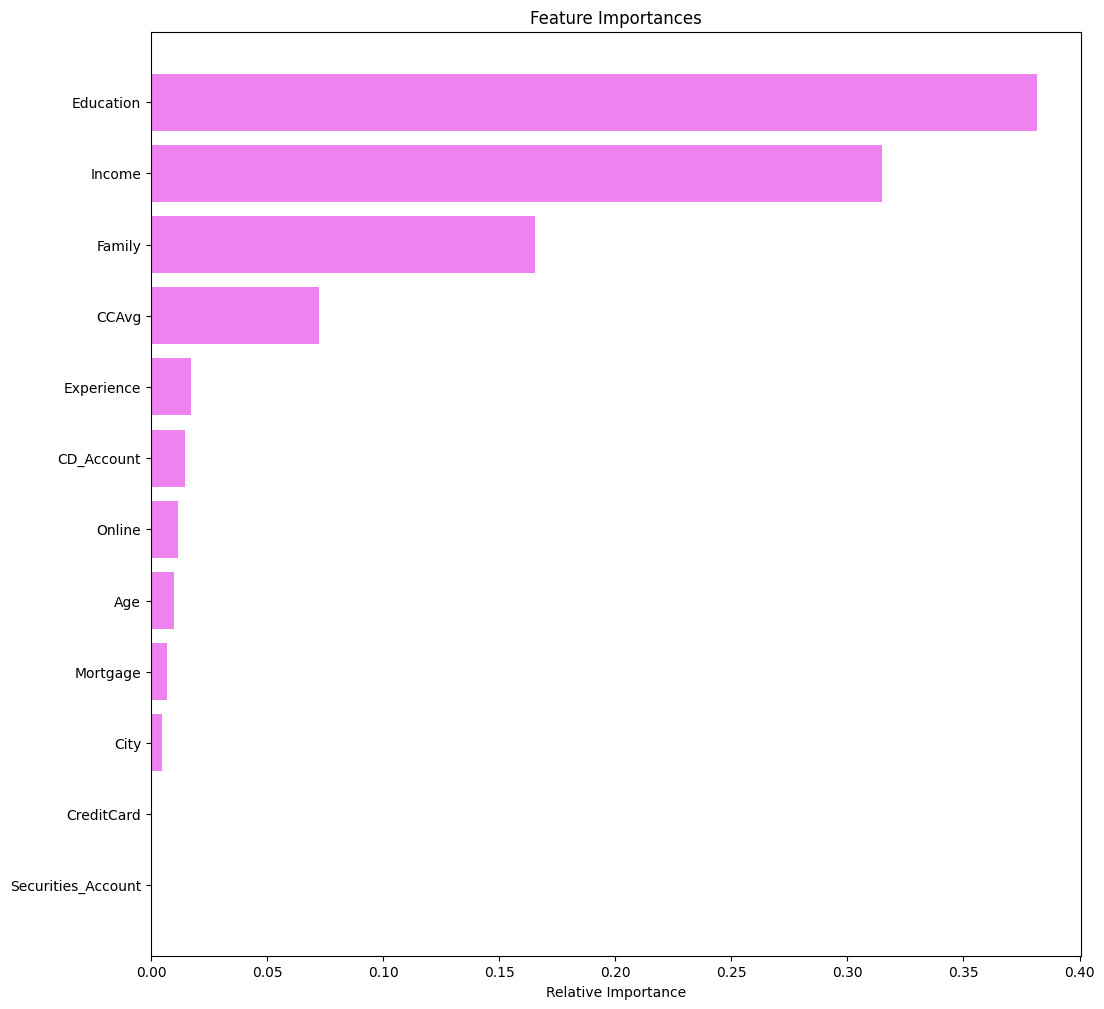

In [ ]:
importances = best_model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

### We see that City has a very little effect on Loan Purchase
- However, for the sake of completeness, let's find out which cities are preferred for Loan Purchase (although negligible)

#### Extracting City information
#### <a name='link3'>Extracting City information</a>
- Create city_importances list.  
- city_encoding dictionary `city_encoding` was created earlier. To review,click <a href = #link2>here</a>.
- create a DF showing City Loan Approval probabilities
- Sort and show the DF with ascending=False

In [ ]:
# Extract the importance of the City feature
city_importances = []

for node in tree_rules.split('\n'):
    if 'City' in node:
        city_importances.append(node)

# Print the city-related rules
for rule in city_importances:
    print(rule)


|   |   |   |   |   |   |--- City <= 207.50
|   |   |   |   |   |   |--- City >  207.50
|   |   |   |   |   |--- City <= 237.00
|   |   |   |   |   |--- City >  237.00


In [ ]:

# Create a DataFrame to store city probabilities
city_probabilities = []

# Iterate through each unique city
for city_name, encoded_city in city_encoding.items():
    # Create a copy of X_test with all city values set to the current city
    X_test_temp = X_test.copy()
    X_test_temp['City'] = encoded_city

    # Predict probabilities for this modified test set
    probabilities = best_model.predict_proba(X_test_temp)[:, 1]  # Probability of the positive class (loan approved)

    # Calculate mean probability for this city
    mean_probability = np.mean(probabilities)

    # Store the results
    city_probabilities.append((city_name, mean_probability)) # list of tuples.  each tuple contains city_name and mean_probability

# Create a DataFrame to display the results
df_city_probabilities = pd.DataFrame(city_probabilities, columns=['City', 'Probability'])

# Sort by probability in descending order
df_city_probabilities = df_city_probabilities.sort_values(by='Probability', ascending=False)

# Display the results
df_city_probabilities


,City,Probability
244,Yucaipa,0.113290
243,Yorba Linda,0.113290
242,Woodland Hills,0.113290
241,Whittier,0.113290
240,Westlake Village,0.113290
...,...,...
220,Sunnyvale,0.102619
221,Sylmar,0.102619
222,Tahoe City,0.102619
223,Tehachapi,0.102619


In [ ]:
df_city_probabilities_sorted = df_city_probabilities.sort_values(by='Probability', ascending=False)
df_city_probabilities_sorted.head(10)

,City,Probability
244,Yucaipa,0.113290
242,Woodland Hills,0.113290
241,Whittier,0.113290
240,Westlake Village,0.113290
239,West Sacramento,0.113290
238,West Covina,0.113290
243,Yorba Linda,0.113290
10,Bakersfield,0.104643
13,Bella Vista,0.104643
12,Banning,0.104643


## Model Comparison and Final Model Selection

### Compare

In [ ]:
# Pre Pruning Scores
## Calculate evaluation metrics for the training set
y_train_pred_PRE = best_estimator.predict(X_train) # first Use the best estimator to predict on the training set
train_accuracy_PRE = accuracy_score(y_train, y_train_pred_PRE)
train_precision_PRE = precision_score(y_train, y_train_pred_PRE)
train_recall_PRE = recall_score(y_train, y_train_pred_PRE)
train_f1_PRE = f1_score(y_train, y_train_pred_PRE)



## Calculate evaluation metrics for the testing set
y_test_pred_PRE = best_estimator.predict(X_test) # first Use the best estimator to predict on the testing set
test_accuracy_PRE = accuracy_score(y_test, y_test_pred_PRE)
test_precision_PRE = precision_score(y_test, y_test_pred_PRE)
test_recall_PRE = recall_score(y_test, y_test_pred_PRE)
test_f1_PRE = f1_score(y_test, y_test_pred_PRE)



# Post Pruning Scores
## Calculate evaluation metrics for the training set
y_train_pred_PP = best_model.predict(X_train) # first Use the best estimator to predict on the training set
train_accuracy_PP = accuracy_score(y_train, y_train_pred_PP)
train_precision_PP = precision_score(y_train, y_train_pred_PP)
train_recall_PP = recall_score(y_train, y_train_pred_PP)
train_f1_PP = f1_score(y_train, y_train_pred_PP)



## Calculate evaluation metrics for the testing set
y_test_pred_PP = best_model.predict(X_test) # first Use the best estimator to predict on the testing set
test_accuracy_PP = accuracy_score(y_test, y_test_pred_PP)
test_precision_PP = precision_score(y_test, y_test_pred_PP)
test_recall_PP = recall_score(y_test, y_test_pred_PP)
test_f1_PP = f1_score(y_test, y_test_pred_PP)


# Create a DataFrame to store the metrics
metrics = {
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
    'TrainingSet_PostPruning': [train_accuracy_PP, train_precision_PP, train_recall_PP, train_f1_PP],
    'TestSet_PostPruning': [test_accuracy_PP, test_precision_PP, test_recall_PP, test_f1_PP],
    'TrainingSet_PrePruning': [train_accuracy_PRE, train_precision_PRE, train_recall_PRE, train_f1_PRE],
    'TestSet_PrePruning': [test_accuracy_PRE, test_precision_PRE, test_recall_PRE, test_f1_PRE],

}



df_metrics_comp = pd.DataFrame(metrics)
df_metrics_comp.set_index('Metric', inplace=True)



## Show the Comparision of Recall Score for:
- Post Pruning Deision Tree
- Pre Pruning Decision Tree

In [ ]:
def highlight_recall(row):
    color = 'background-color: yellow'
    return [color if row.name == 'Recall' else '' for _ in row] # note '_' is a throwaway variable

df_metrics_comp.style.apply(highlight_recall, axis=1)


,TrainingSet_PostPruning,TestSet_PostPruning,TrainingSet_PrePruning,TestSet_PrePruning
Metric,,,,
Accuracy,0.995429,0.982667,0.982571,0.982000
Precision,0.975232,0.911950,0.948630,0.951389
Recall,0.975232,0.923567,0.857585,0.872611
F1 Score,0.975232,0.917722,0.900813,0.910299


**Observation**

We should choose the Post-Pruning model because it has the highest recall score on the test set, which is 0.923567.

### Receiver Operating Characteristic (ROC) Curve and Area Under Curve (AUC)

- predict: Outputs the predicted class labels. (not used in this case)
- predict_proba: Outputs the probabilities for each class.
- The slicing [:, 1] is used to extract the probabilities of the positive class (class 1) from the output of the predict_proba method
- `roc curve (y_test, y_test_proba_post_pruning)` returns 3 arrays:
  - `fpr`: False positive rates at different thresholds.
  - `tpr`: True positive rates at different thresholds.
  - `thresholds`: Threshold values used to compute `fpr` and `tpr`
    - In our case, we don't really care about `thresholds`, so we use a `_` for that as a throwaway variable
- `plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')`: Explanation of the coordinates:
  - `[0, 1]` on the x-axis: Represents the range of FPR from 0 to 1.
  - `[0, 1]` on the y-axis: Represents the range of TPR from 0 to 1.    

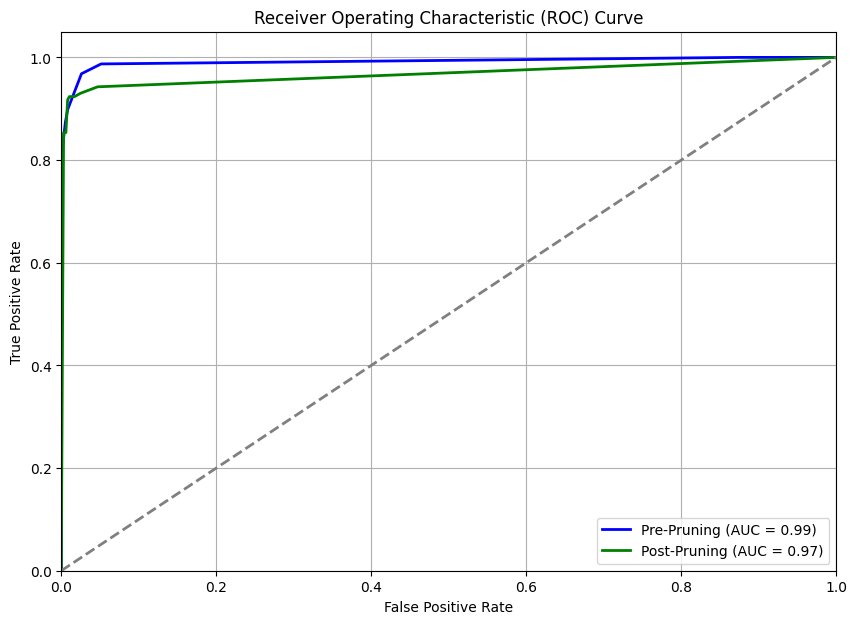

In [ ]:
from sklearn.metrics import roc_curve, auc
# Predict probabilities for the test set
y_test_proba_pre_pruning =  best_estimator.predict_proba(X_test)[:,1]
y_test_proba_post_pruning = best_model.predict_proba(X_test)[:,1]

# Compute ROC curve and ROC area for pre-pruning model
fpr_pre_pruning, tpr_pre_pruning, _ = roc_curve(y_test, y_test_proba_pre_pruning)
roc_auc_pre_pruning = auc(fpr_pre_pruning, tpr_pre_pruning)

# Compute ROC curve and ROC area for post-pruning model
fpr_post_pruning, tpr_post_pruning, _ = roc_curve(y_test, y_test_proba_post_pruning)
roc_auc_post_pruning = auc(fpr_post_pruning, tpr_post_pruning)

# Plotting the ROC curve
plt.figure(figsize=(10, 7))
plt.plot(fpr_pre_pruning, tpr_pre_pruning, color='blue', lw=2, label=f'Pre-Pruning (AUC = {roc_auc_pre_pruning:.2f})')
plt.plot(fpr_post_pruning, tpr_post_pruning, color='green', lw=2, label=f'Post-Pruning (AUC = {roc_auc_post_pruning:.2f})')

# Plotting the diagonal line for reference
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')

# Setting plot details
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)

plt.show()

**Observation and Analysis**

- based on the AUC of Pre-Pruning being slightly better than the AUC of Post-Pruning, (0.99 compared to 0.97), Pre-Pruning model seems to be slightly better.

**However:**
We should still choose the Post Pruning model for these reasons:

1. **Higher Recall:**

- The post-pruning model has a higher recall on both the training set (0.975232) and the test set (0.923567) compared to the pre-pruning model (0.857585 on training set and 0.872611 on test set).
- Higher recall means the post-pruning model is better at identifying true positive instances (minimize false negatives), which is what we want in our case

2. **Higher F1 Score:**
- The F1 score balances precision and recall. The post-pruning model has a higher F1 score on both the training and test sets, indicating better overall performance when both precision and recall are important.

3. **Better Generalization:**

- Although the pre-pruning model has a slightly higher AUC, the post-pruning model has better recall and F1 score, suggesting it generalizes better to the test set. This might mean it is less prone to overfitting and better suited for real-world application where recall and balanced performance are critical.




## Actionable Insights and Business Recommendations


* What recommedations would you suggest to the bank?

Based on the decision tree (Post Pruning) output rules, here are some insights and recommendations that can be derived:

**Insights**

1. **Income as a Key Factor:**

- Income is a primary factor in determining loan approval. Applicants with an income greater than 113.50 are more likely to be approved for a loan, particularly if other conditions (like Education and Family size) are favorable.

2. **Credit Card Average (CCAvg):**

- CCAvg is another important factor. For applicants with lower income (<= 113.50), CCAvg values influence the decision significantly. Higher CCAvg generally increases the likelihood of loan approval if other conditions are met.

3. **Education Level:**

Education level plays a crucial role, especially for applicants with higher income (> 113.50). Higher education levels (Education > 1.50) increase the chances of loan approval.

4. **Family Size:**

Family size impacts the decision, particularly in combination with other factors like Income and Education. For instance, a larger family size (> 3.50) can increase the chances of loan approval in specific scenarios.

5. **Experience:**

Experience also influences loan approval, but its effect is more nuanced and interacts with other factors like CCAvg and City.

6. **City:**

The City feature impacts the decision but is less influential compared to factors like Income and Education. Specific city codes can sway the decision positively or negatively in some branches.

7. **CD_Account:**

Having a CD Account (CD_Account > 0.50) increases the likelihood of loan approval.

8. **Age and Mortgage:**

Age and Mortgage also play roles in specific branches of the decision tree, particularly in combination with other factors like Income and CCAvg.

**Recommendations**

1. **Target High-Income Individuals:**

- Marketing efforts should prioritize individuals with higher incomes, particularly those earning more than 113.50. Tailored loan products and offers can be created for this demographic.

2. **Focus on Education:**

- Develop targeted campaigns for individuals with higher education levels. Educated individuals tend to have better loan approval chances, especially when their income is above the threshold.

3. **Credit Card Usage:**

- Encourage and educate potential customers on maintaining a reasonable credit card average usage. Individuals with moderate to high CCAvg (between 2.45 and 3.95) show a higher likelihood of loan approval.

4. **Family-Oriented Products:**

- Consider creating family-oriented loan products. Larger family sizes (> 3.50) positively influence loan approval in several scenarios.

5. **Promote CD Accounts:**

- Highlight the benefits of CD accounts to potential customers. Having a CD account is a strong indicator of loan approval, which can be used to cross-sell CD accounts to potential loan applicants.

6. **Consider Experience and Location:**

- While not the most critical factors, experience and location (city) still play roles in the decision. Tailoring communication and offers based on these factors can improve loan approval rates.

The cities below show a higher level of loan approval:
- Yucaipa
- Woodland Hills
- Whittier
- Westlake Village
- West Sacramento
- West Covina
- Yorba Linda

7. **Age and Mortgage:**

- Younger applicants and those with manageable mortgages should be targeted for specific loan products, as these factors contribute positively in certain scenarios.

By understanding these key factors and tailoring marketing and loan products accordingly, the bank can improve its loan approval rates and better serve its customers.

## Converting to html format for submission

In [ ]:
%%shell
#convert to html
jupyter nbconvert --to html
jupyter nbconvert SM-AIML_ML_Project_full_code_notebook.ipynb --to html

This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent to: [--JupyterApp.answer_yes=True]
--execute
    Execute the notebook prior to export.
    Equivalent to: [--ExecutePr

___